In [1]:
import numpy as np
import scipy
import scipy.stats
import torch as t

import matplotlib.pyplot as plt
from IPython.display import clear_output, display

from torch.nn import Sequential, Linear, ReLU, LeakyReLU, Dropout, Sigmoid

In [2]:
%matplotlib inline

In [3]:
device=t.device('cpu') #Overrride the above device choice

### Generate the sample 2D distribution: uniform from unit circle.  

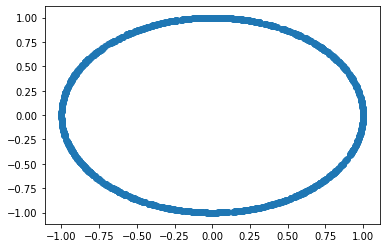

In [4]:
angle = np.random.uniform(-np.pi,np.pi,(1000,1)).astype('float32')
data = np.concatenate((np.cos(angle), np.sin(angle)),axis=1)
plt.scatter(data[:,0], data[:,1])

### GAN implementation

In [5]:
discriminator = Sequential(
    Linear(2,20),  
    LeakyReLU(0.2),
    Linear(20, 1), 
    Sigmoid()
) #dummy discriminator: please subsitute you own implementation 

In [6]:
generator = Sequential(
    Linear(2,500),
    LeakyReLU(0.1),
    
    Linear(500,200),
    LeakyReLU(0.1),
    
    Linear(200,100),
    LeakyReLU(0.1),
    
    Linear(100,100),
    LeakyReLU(0.1),
    
    Linear(100,50),
    LeakyReLU(0.1),
    
    Linear(50, 2),
    ReLU()
    
)# dummy generator: please subsitute you own implementation 

In [7]:
discriminator = discriminator.to(device) 
generator= generator.to(device)

d_optimizer = t.optim.Adam(discriminator.parameters(), lr=0.0005)
g_optimizer = t.optim.Adam(generator.parameters(), lr=0.0005)

loss = t.nn.BCELoss()

## Starting here

In [8]:
def real_data_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = t.ones(size, 1)

    return data

def fake_data_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = t.zeros(size, 1)

    return data

In [9]:
def train_discriminator(optimizer, real_data, fake_data):
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    
    error_real = loss(prediction_real, real_data_target(real_data.size(0)))
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, fake_data_target(real_data.size(0)))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error
    return error_real + error_fake

In [10]:
def train_generator(optimizer, fake_data):
    # 2. Train Generator
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # Calculate error and backpropagate
    error = loss(prediction, real_data_target(prediction.size(0)))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

In [11]:
def show(noise, fake, real):
    
    fig, axs = plt.subplots(1,3, figsize = (12,4))
    
    axs[0].set_title("noise")
    axs[1].set_title("fake")
    axs[2].set_title("real")
    
    axs[0].scatter(noise.data.cpu().numpy()[:,0],noise.data.cpu().numpy()[:,1], color = 'gray')
    axs[1].scatter(fake.data.cpu().numpy()[:,0], fake.data.cpu().numpy()[:,1], color = 'red')
    axs[2].scatter(real.data.cpu().numpy()[:,0], real.data.cpu().numpy()[:,1], color = 'green')

    fig.tight_layout()
    plt.show()

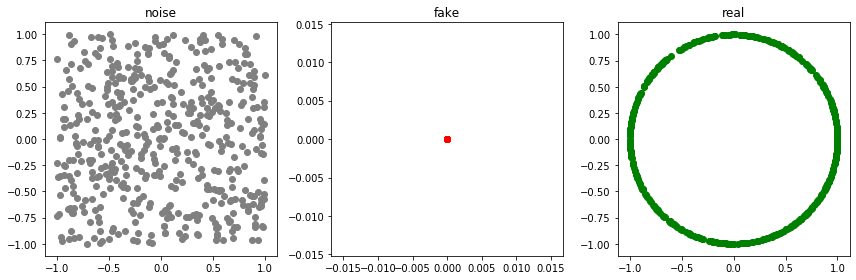

Epoch: 0 G-error: 0.7032859325408936 D-error: 1.376889705657959


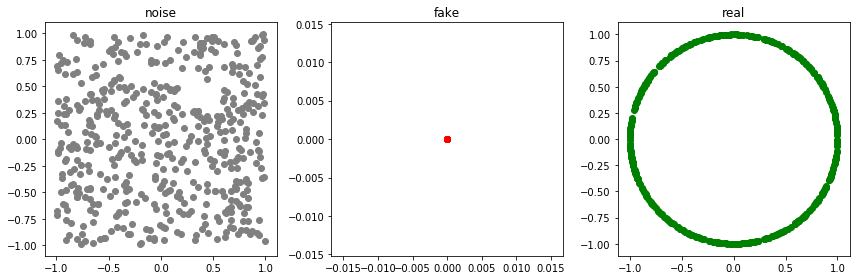

Epoch: 1 G-error: 0.7032859325408936 D-error: 1.376889705657959


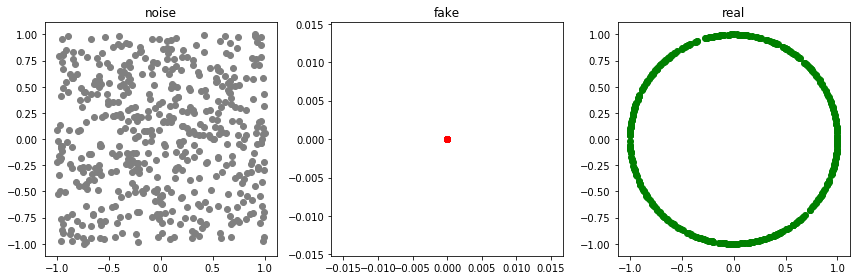

Epoch: 2 G-error: 0.7029722332954407 D-error: 1.3787057399749756


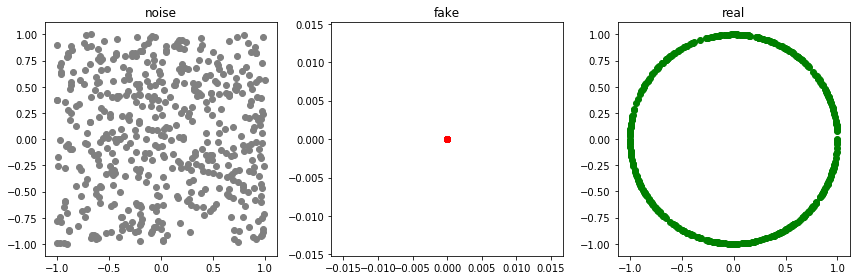

Epoch: 3 G-error: 0.7029722332954407 D-error: 1.3787057399749756


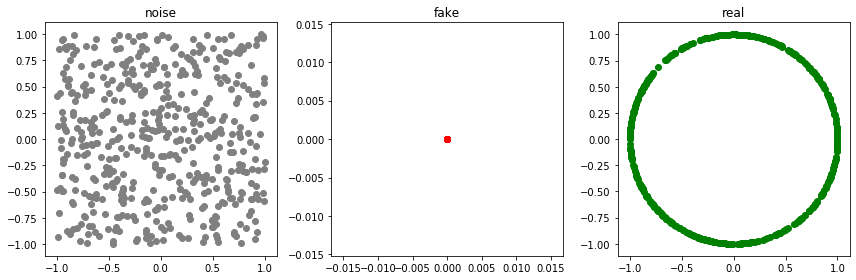

Epoch: 4 G-error: 0.7026649713516235 D-error: 1.3786022663116455


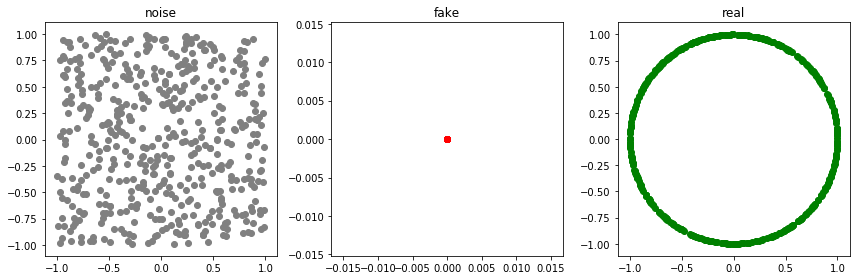

Epoch: 5 G-error: 0.7026649713516235 D-error: 1.3786022663116455


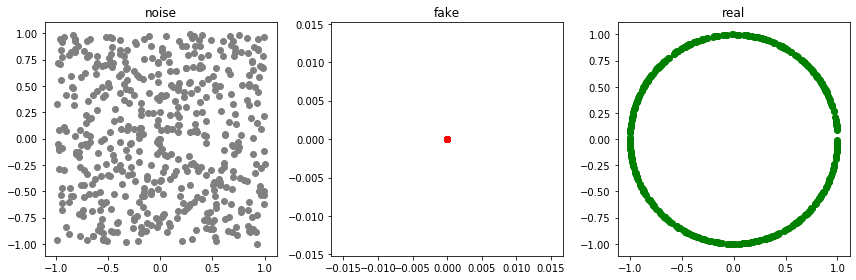

Epoch: 6 G-error: 0.7023537158966064 D-error: 1.379163146018982


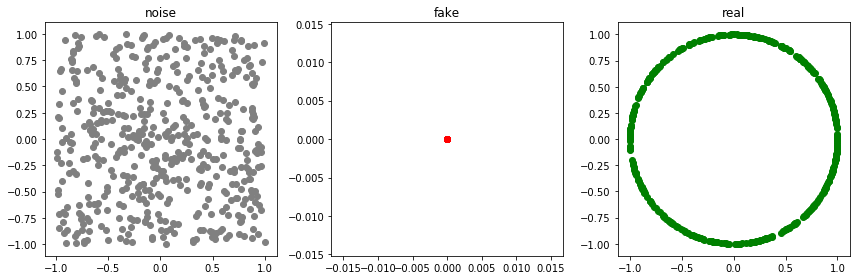

Epoch: 7 G-error: 0.7023537158966064 D-error: 1.379163146018982


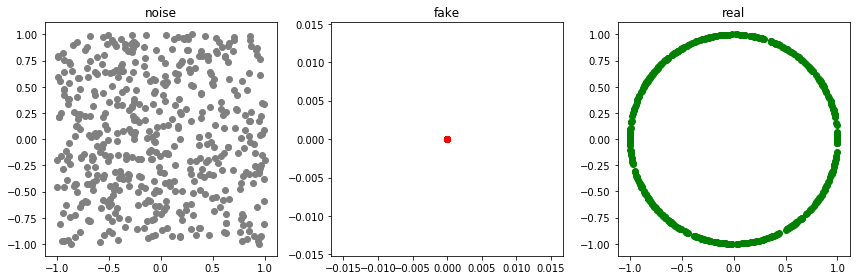

Epoch: 8 G-error: 0.7020674347877502 D-error: 1.3796747922897339


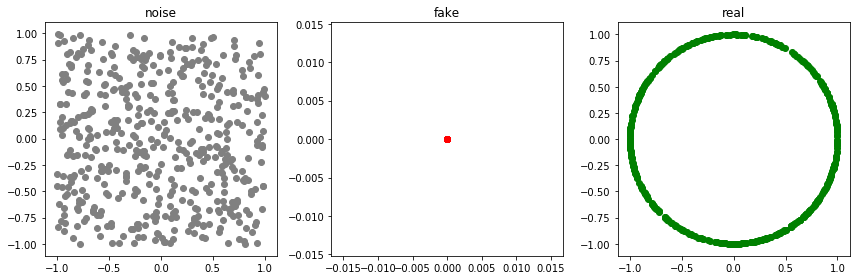

Epoch: 9 G-error: 0.7020674347877502 D-error: 1.3796747922897339


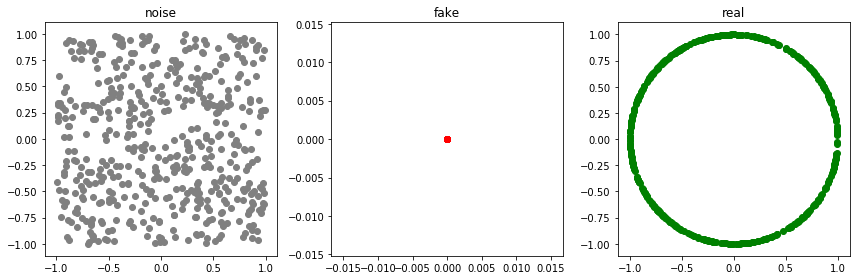

Epoch: 10 G-error: 0.7018099427223206 D-error: 1.3809990882873535


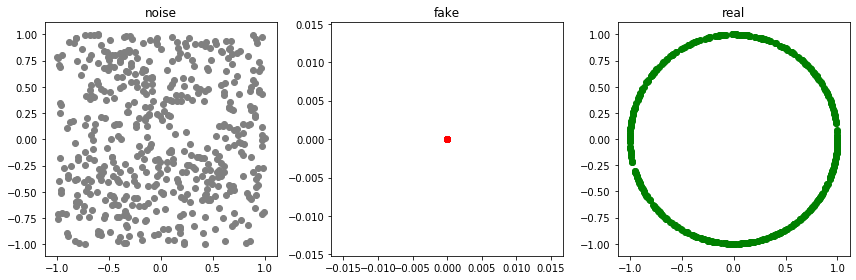

Epoch: 11 G-error: 0.7018099427223206 D-error: 1.3809990882873535


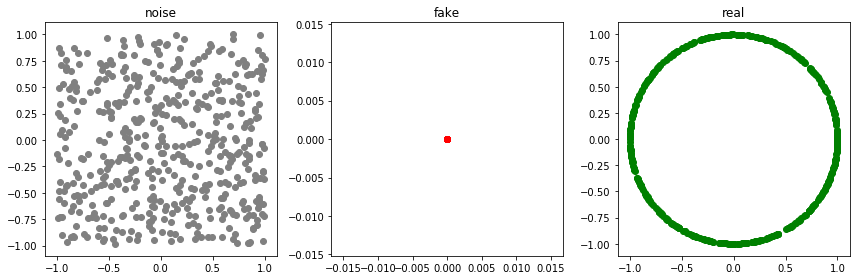

Epoch: 12 G-error: 0.7015486359596252 D-error: 1.3742430210113525


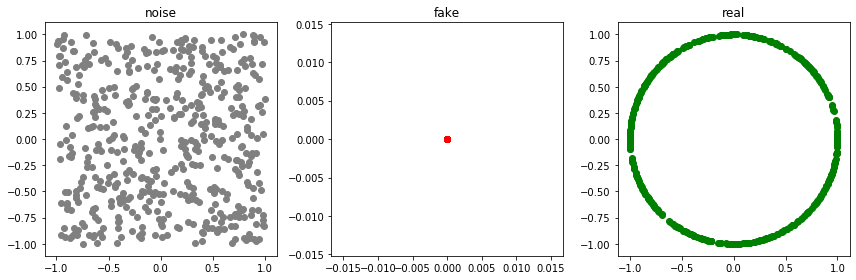

Epoch: 13 G-error: 0.7015486359596252 D-error: 1.3742430210113525


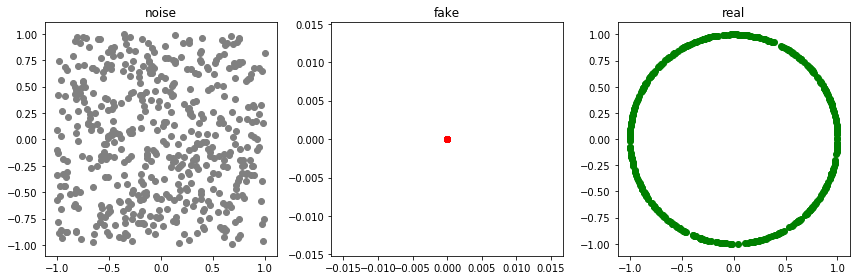

Epoch: 14 G-error: 0.7012932896614075 D-error: 1.380535364151001


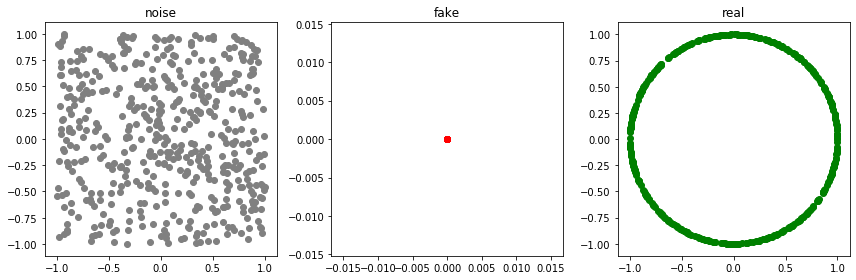

Epoch: 15 G-error: 0.7012932896614075 D-error: 1.380535364151001


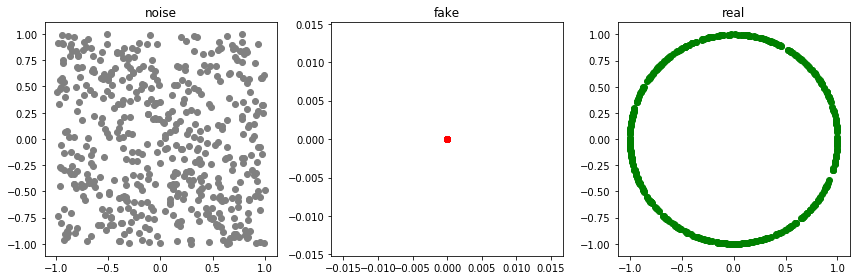

Epoch: 16 G-error: 0.7010393142700195 D-error: 1.377533197402954


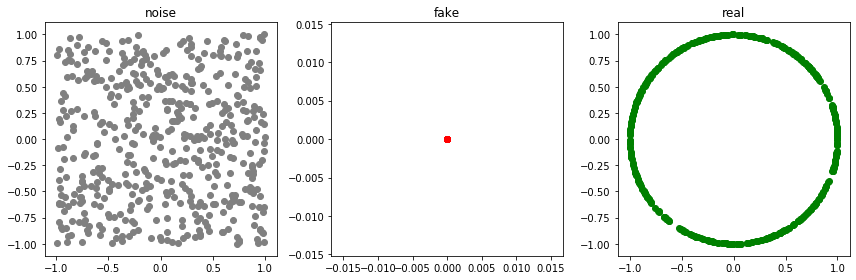

Epoch: 17 G-error: 0.7010393142700195 D-error: 1.377533197402954


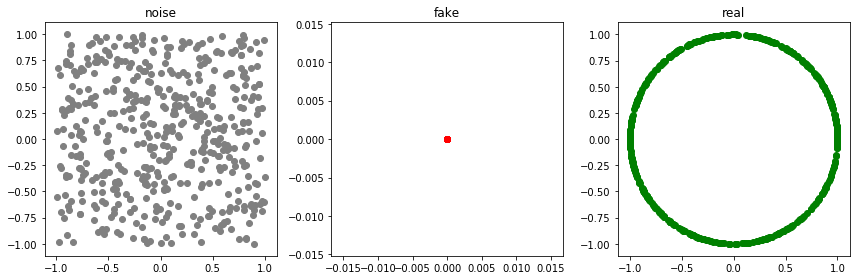

Epoch: 18 G-error: 0.7007779479026794 D-error: 1.3783764839172363


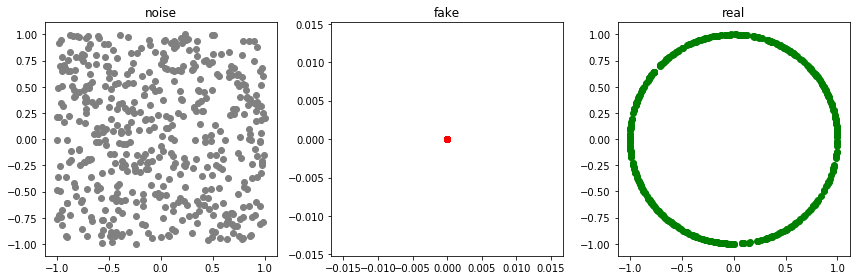

Epoch: 19 G-error: 0.7007779479026794 D-error: 1.3783764839172363


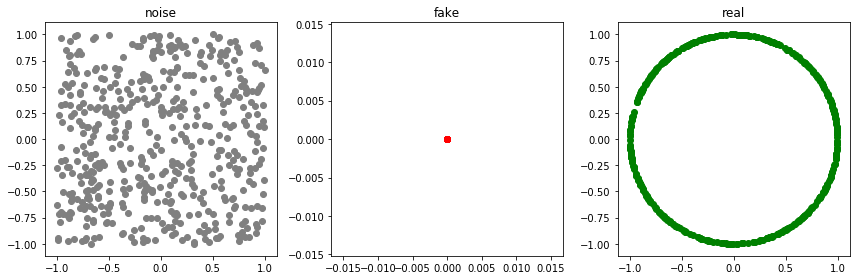

Epoch: 20 G-error: 0.7005399465560913 D-error: 1.37801194190979


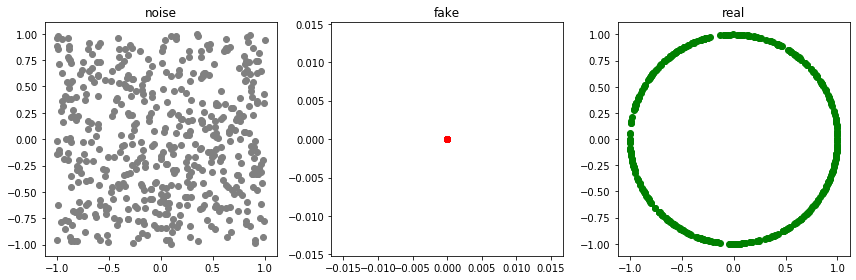

Epoch: 21 G-error: 0.7005399465560913 D-error: 1.37801194190979


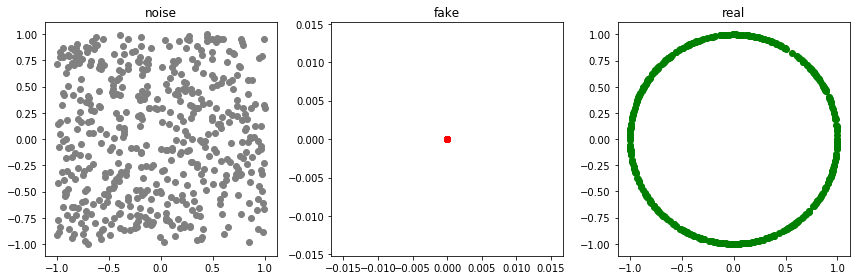

Epoch: 22 G-error: 0.7003374099731445 D-error: 1.3720614910125732


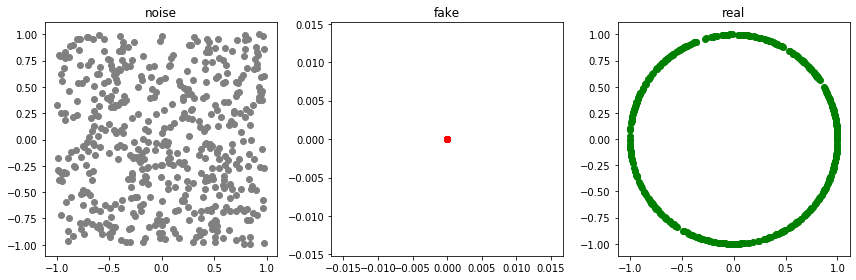

Epoch: 23 G-error: 0.7003374099731445 D-error: 1.3720614910125732


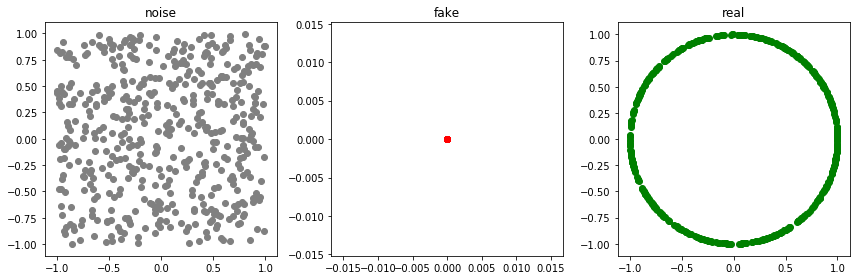

Epoch: 24 G-error: 0.7001647353172302 D-error: 1.3724141120910645


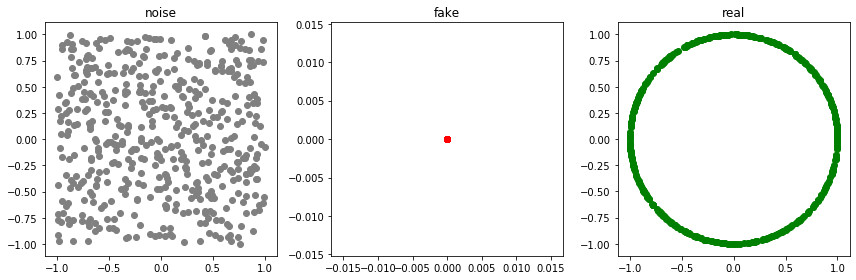

Epoch: 25 G-error: 0.7001647353172302 D-error: 1.3724141120910645


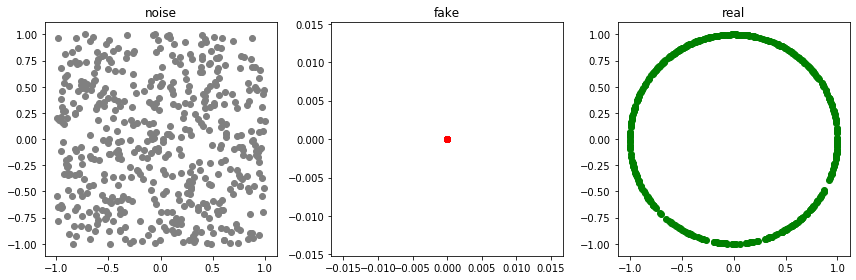

Epoch: 26 G-error: 0.7000031471252441 D-error: 1.3801544904708862


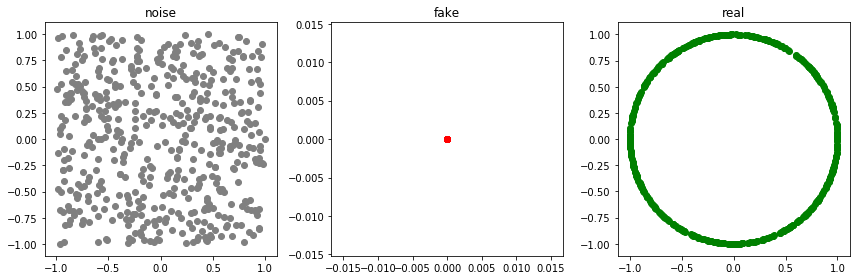

Epoch: 27 G-error: 0.7000031471252441 D-error: 1.3801544904708862


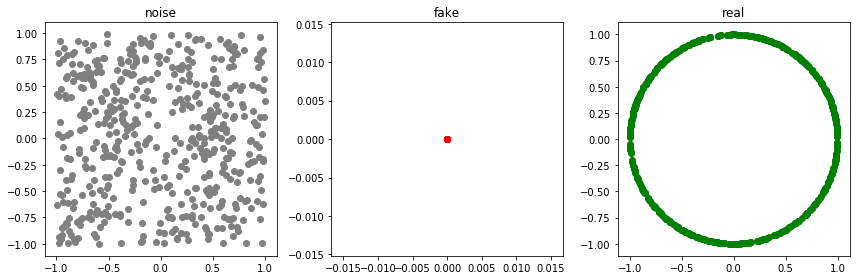

Epoch: 28 G-error: 0.6998617649078369 D-error: 1.3743122816085815


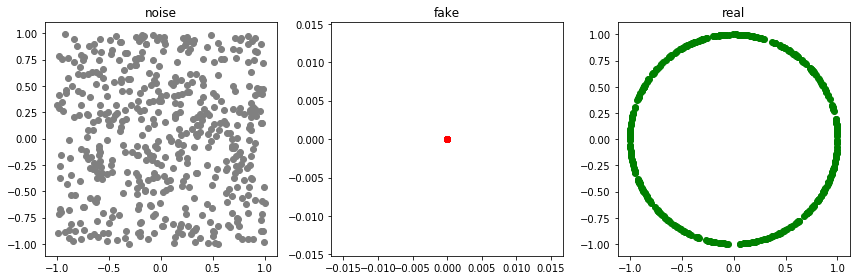

Epoch: 29 G-error: 0.6998617649078369 D-error: 1.3743122816085815


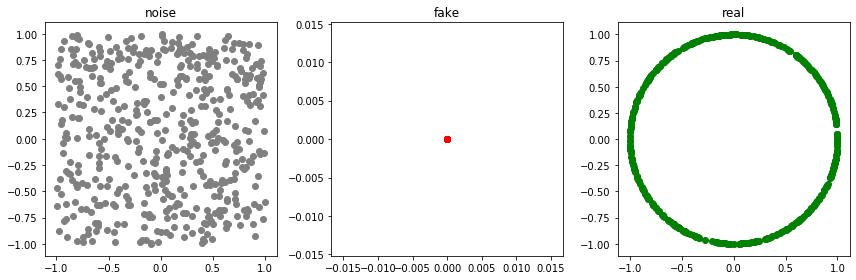

Epoch: 30 G-error: 0.6997480988502502 D-error: 1.3745274543762207


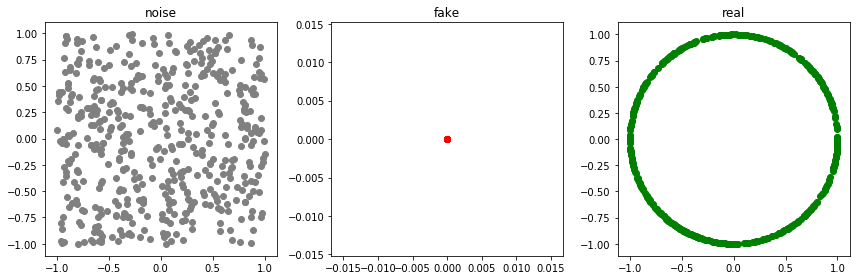

Epoch: 31 G-error: 0.6997480988502502 D-error: 1.3745274543762207


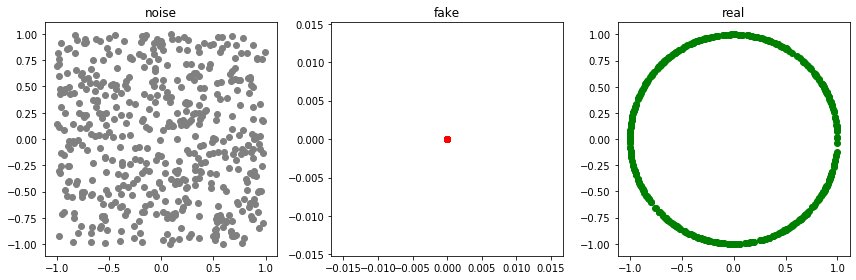

Epoch: 32 G-error: 0.6996743679046631 D-error: 1.3715465068817139


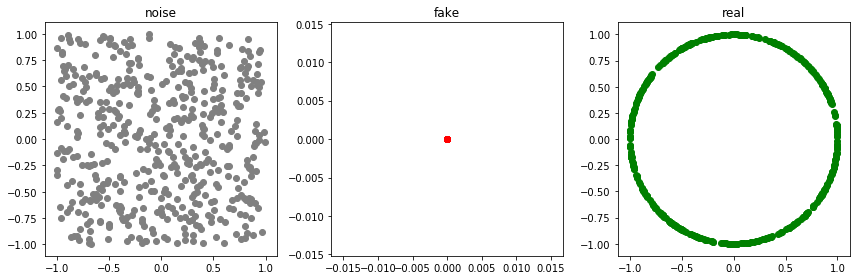

Epoch: 33 G-error: 0.6996743679046631 D-error: 1.3715465068817139


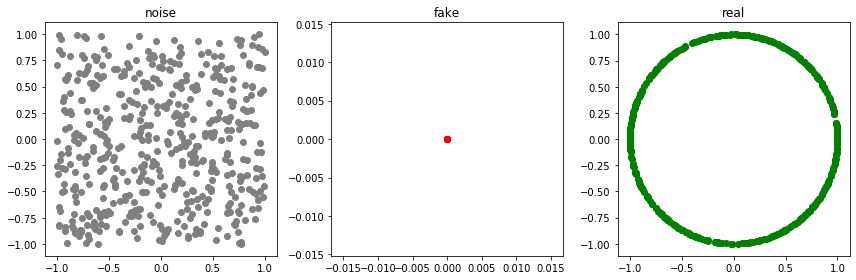

Epoch: 34 G-error: 0.6996245384216309 D-error: 1.3714821338653564


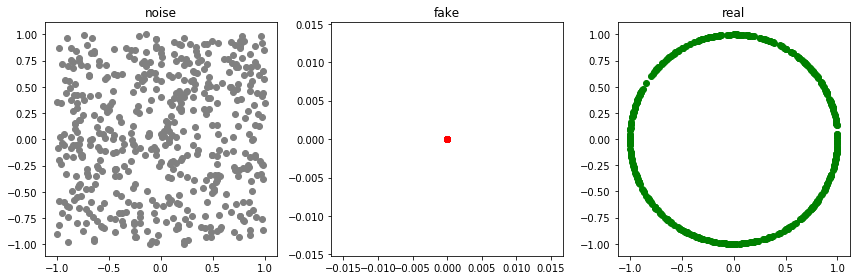

Epoch: 35 G-error: 0.6996245384216309 D-error: 1.3714821338653564


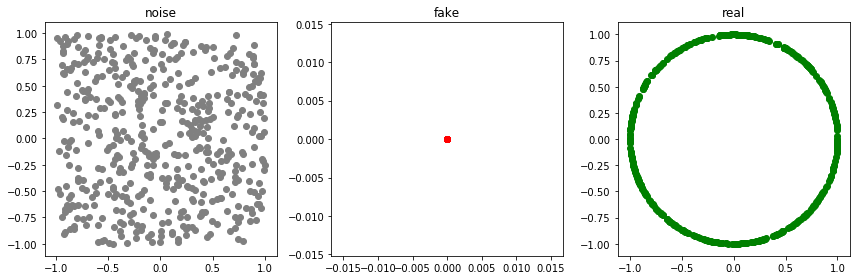

Epoch: 36 G-error: 0.6995939016342163 D-error: 1.3723385334014893


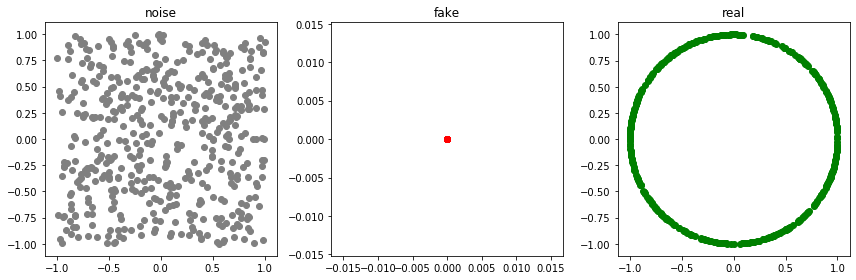

Epoch: 37 G-error: 0.6995939016342163 D-error: 1.3723385334014893


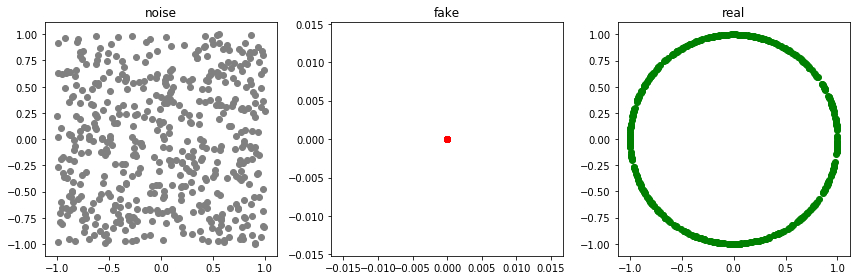

Epoch: 38 G-error: 0.6995826959609985 D-error: 1.3729956150054932


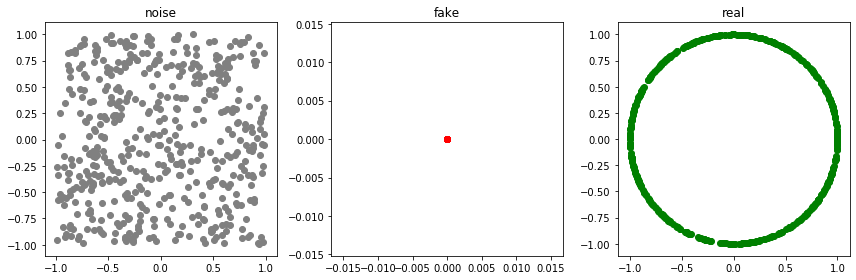

Epoch: 39 G-error: 0.6995826959609985 D-error: 1.3729956150054932


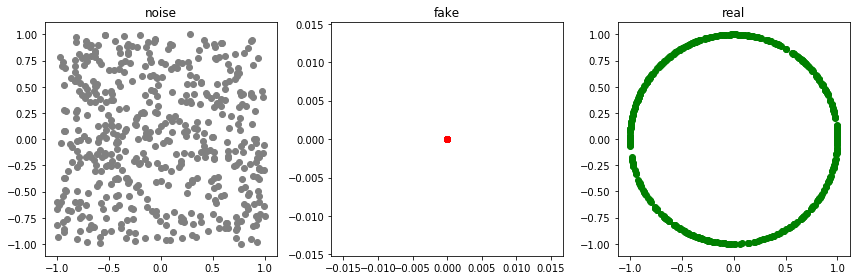

Epoch: 40 G-error: 0.6995648741722107 D-error: 1.376774787902832


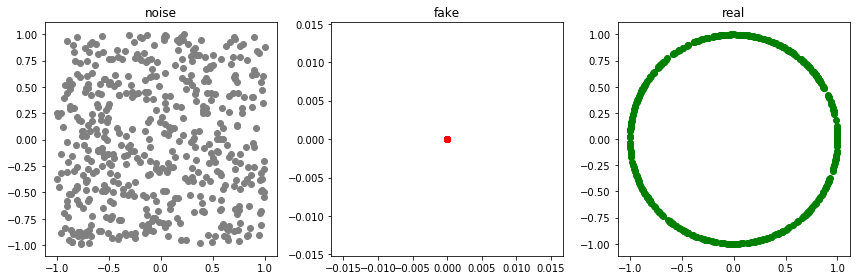

Epoch: 41 G-error: 0.6995648741722107 D-error: 1.376774787902832


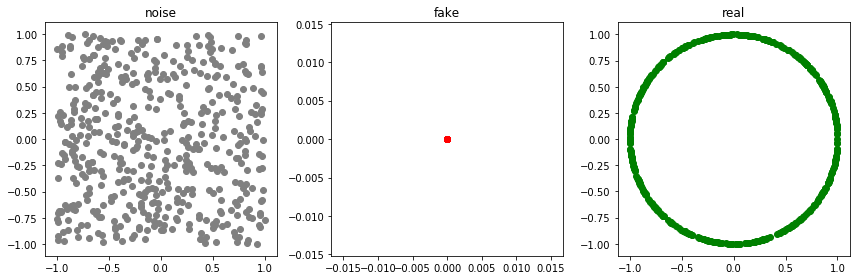

Epoch: 42 G-error: 0.6995739936828613 D-error: 1.3728399276733398


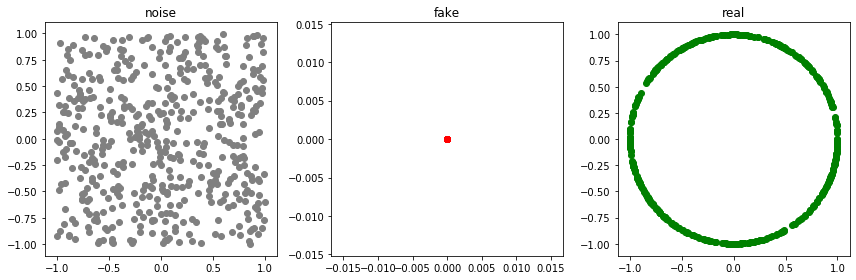

Epoch: 43 G-error: 0.6995739936828613 D-error: 1.3728399276733398


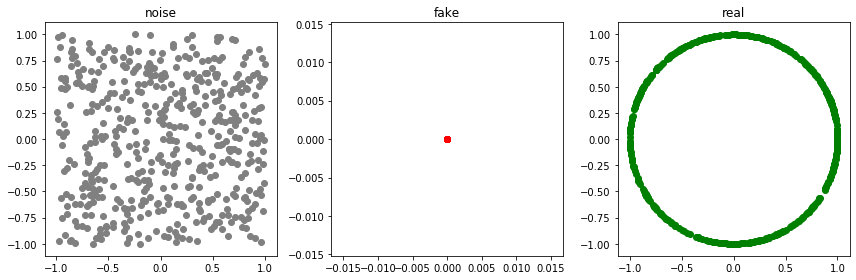

Epoch: 44 G-error: 0.699584424495697 D-error: 1.3755136728286743


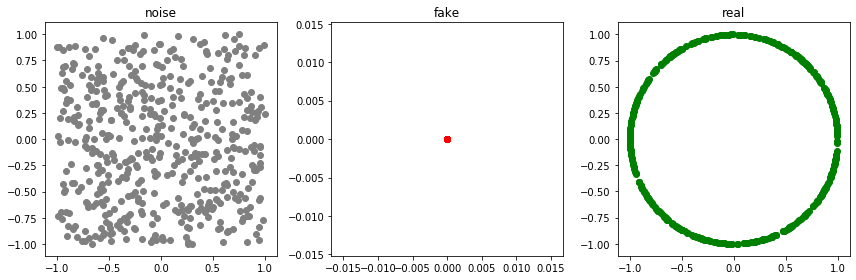

Epoch: 45 G-error: 0.699584424495697 D-error: 1.3755136728286743


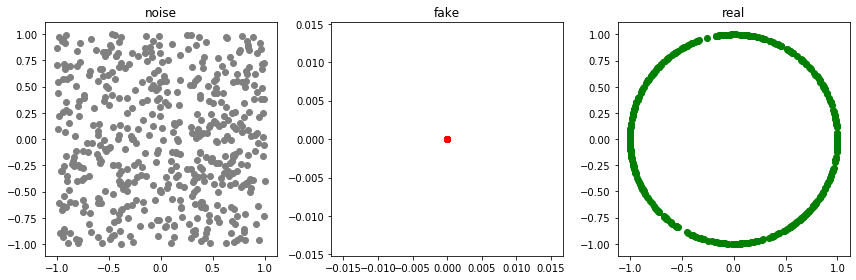

Epoch: 46 G-error: 0.6996260285377502 D-error: 1.368438482284546


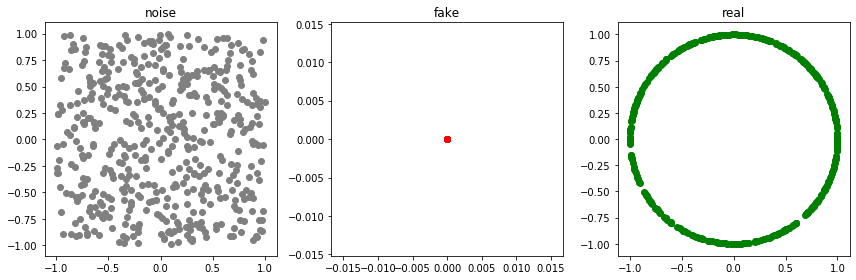

Epoch: 47 G-error: 0.6996260285377502 D-error: 1.368438482284546


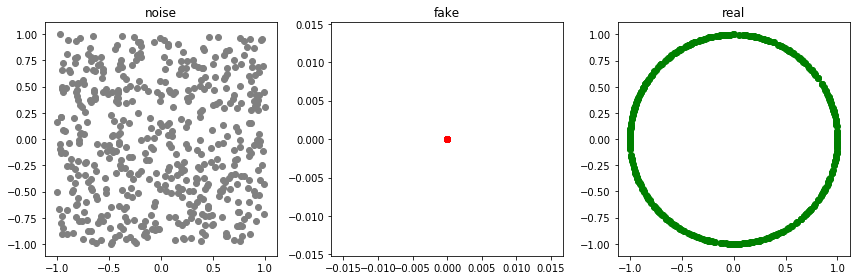

Epoch: 48 G-error: 0.6996850371360779 D-error: 1.3731377124786377


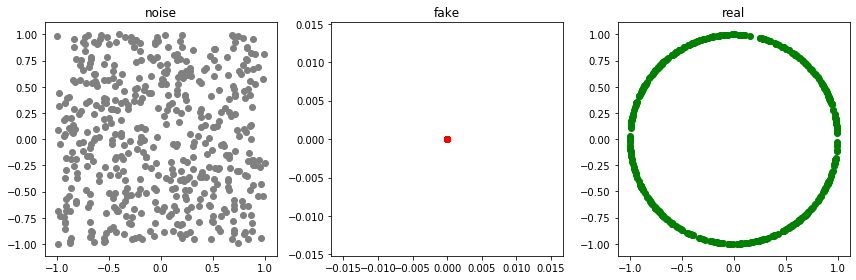

Epoch: 49 G-error: 0.6996850371360779 D-error: 1.3731377124786377


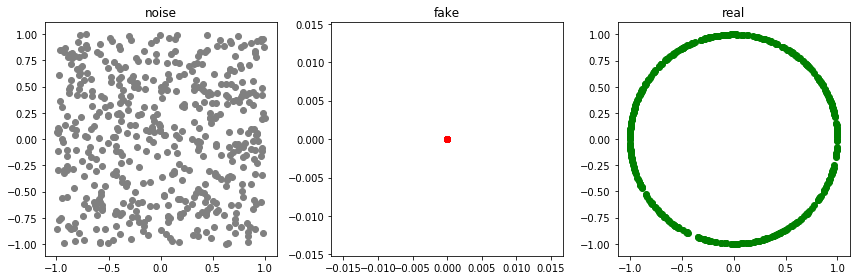

Epoch: 50 G-error: 0.6997464895248413 D-error: 1.3749523162841797


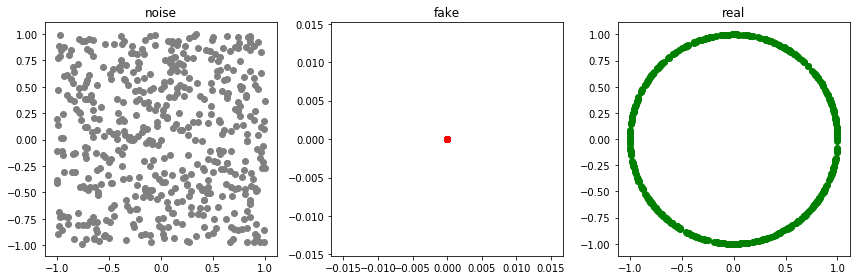

Epoch: 51 G-error: 0.6997464895248413 D-error: 1.3749523162841797


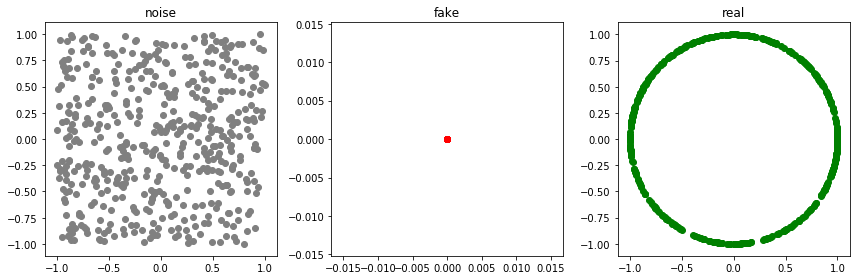

Epoch: 52 G-error: 0.6998291611671448 D-error: 1.3707733154296875


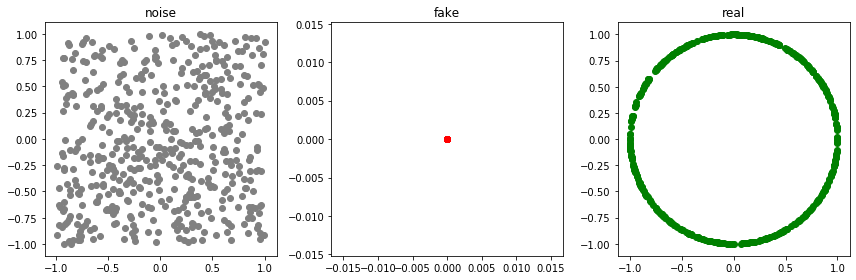

Epoch: 53 G-error: 0.6998291611671448 D-error: 1.3707733154296875


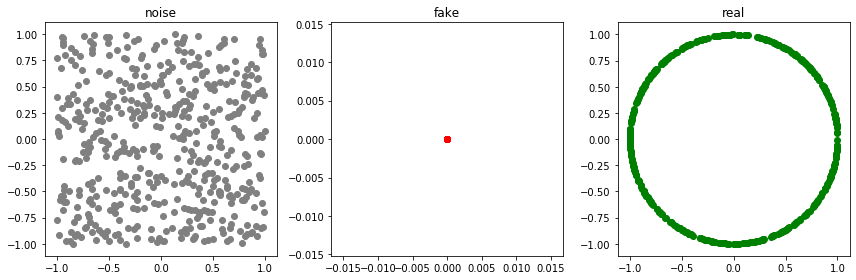

Epoch: 54 G-error: 0.699921190738678 D-error: 1.371544599533081


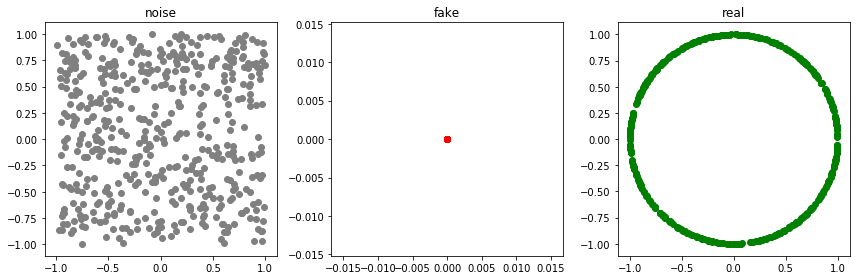

Epoch: 55 G-error: 0.699921190738678 D-error: 1.371544599533081


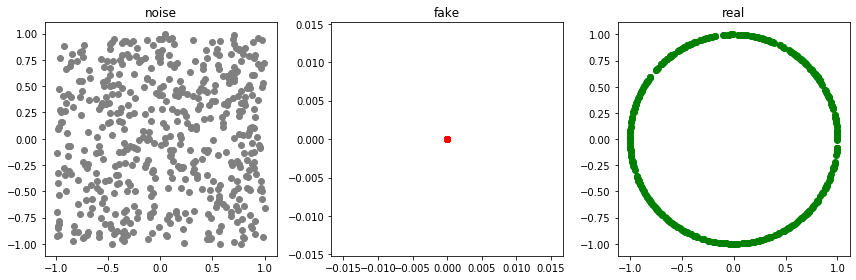

Epoch: 56 G-error: 0.700042188167572 D-error: 1.3684391975402832


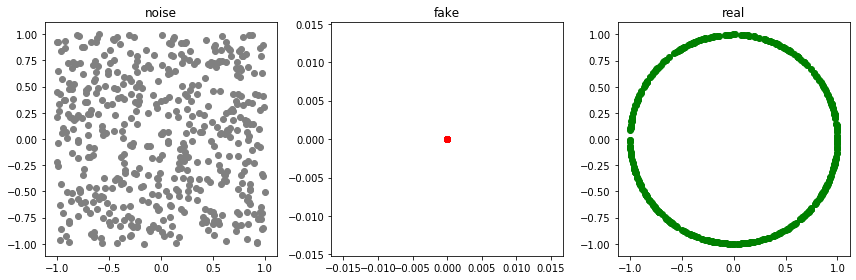

Epoch: 57 G-error: 0.700042188167572 D-error: 1.3684391975402832


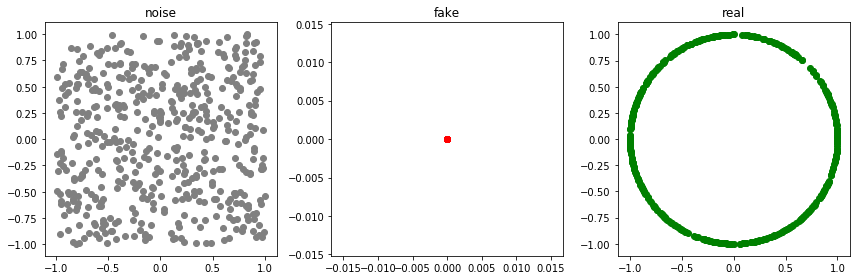

Epoch: 58 G-error: 0.7001925706863403 D-error: 1.368332862854004


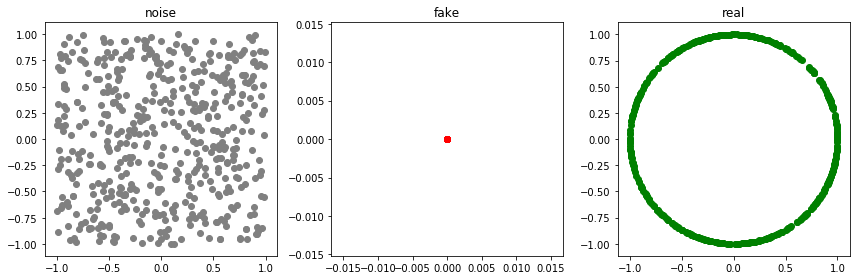

Epoch: 59 G-error: 0.7001925706863403 D-error: 1.368332862854004


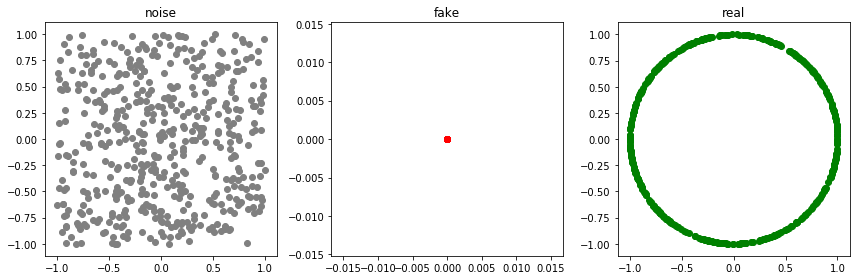

Epoch: 60 G-error: 0.7003568410873413 D-error: 1.3685592412948608


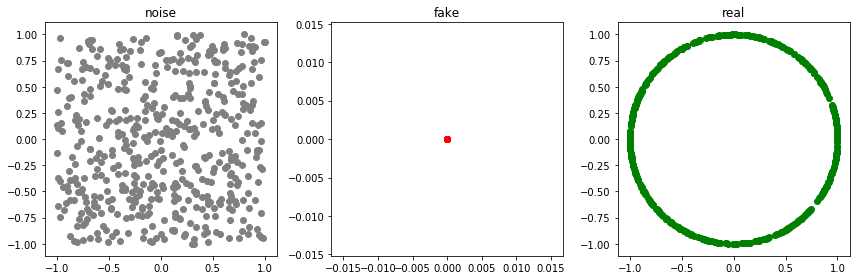

Epoch: 61 G-error: 0.7003568410873413 D-error: 1.3685592412948608


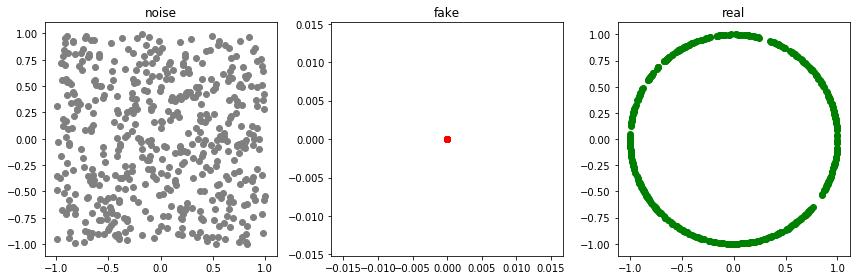

Epoch: 62 G-error: 0.7005531191825867 D-error: 1.3661892414093018


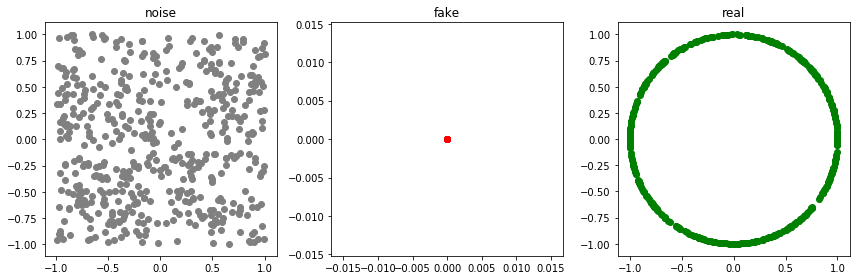

Epoch: 63 G-error: 0.7005531191825867 D-error: 1.3661892414093018


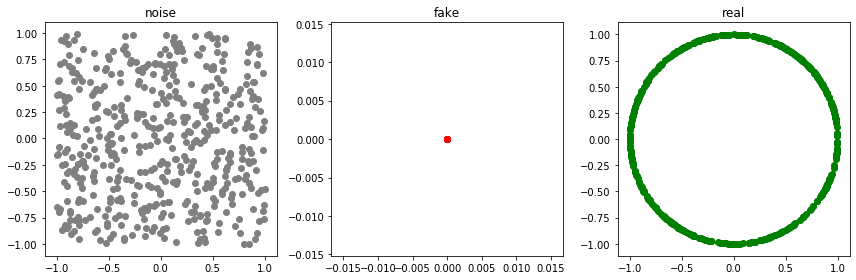

Epoch: 64 G-error: 0.7007551789283752 D-error: 1.3716721534729004


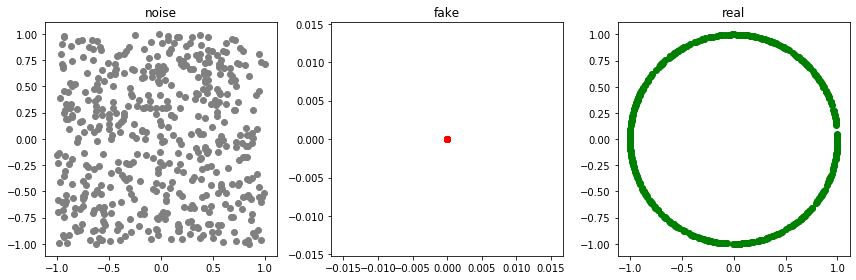

Epoch: 65 G-error: 0.7007551789283752 D-error: 1.3716721534729004


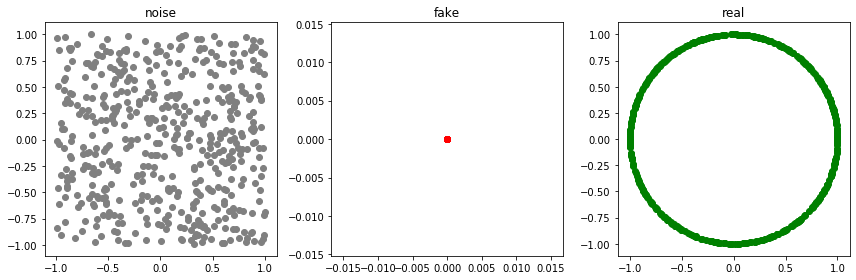

Epoch: 66 G-error: 0.7009782791137695 D-error: 1.366206169128418


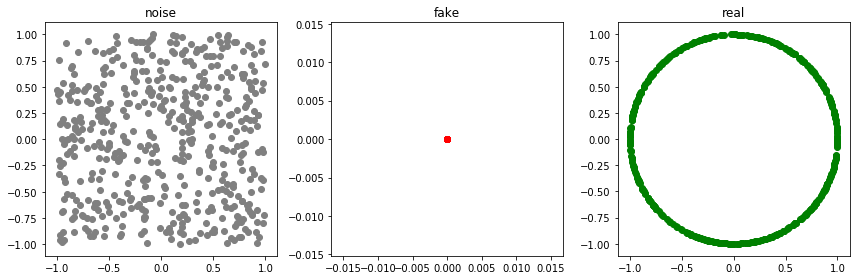

Epoch: 67 G-error: 0.7009782791137695 D-error: 1.366206169128418


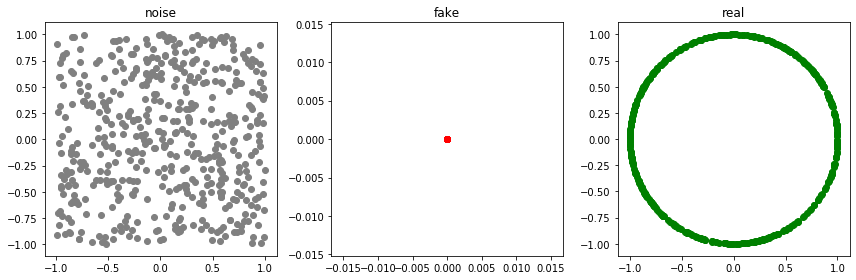

Epoch: 68 G-error: 0.7012023329734802 D-error: 1.3686645030975342


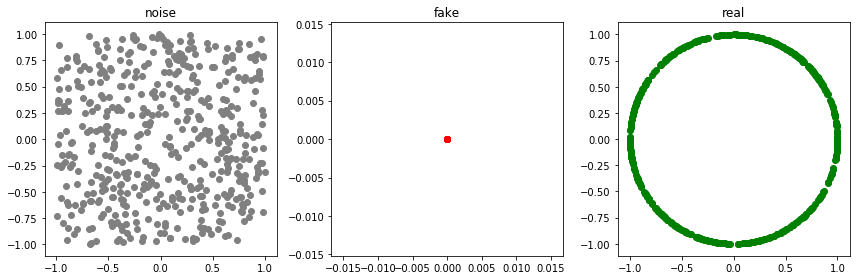

Epoch: 69 G-error: 0.7012023329734802 D-error: 1.3686645030975342


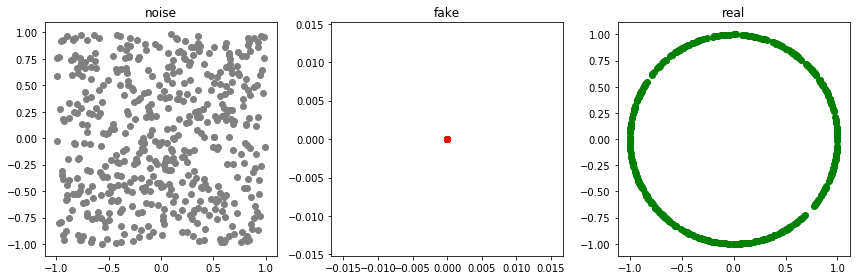

Epoch: 70 G-error: 0.7014486789703369 D-error: 1.3625373840332031


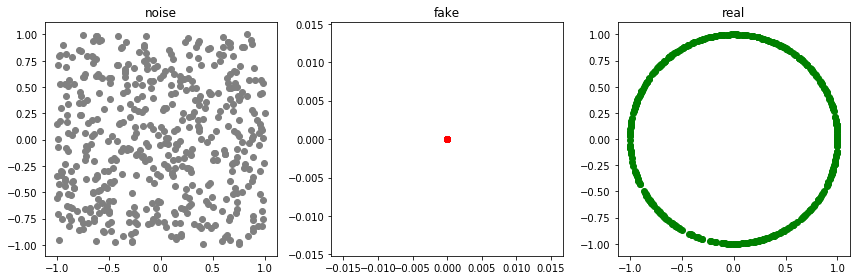

Epoch: 71 G-error: 0.7014486789703369 D-error: 1.3625373840332031


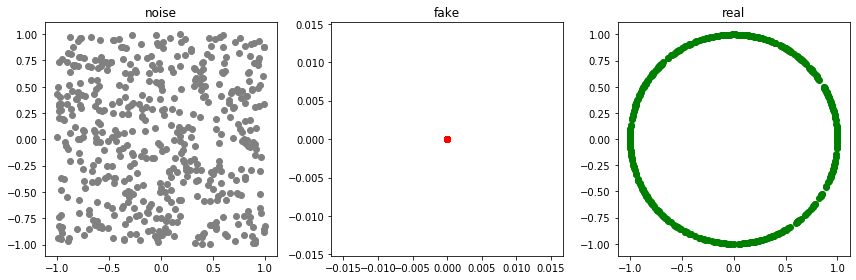

Epoch: 72 G-error: 0.7016934752464294 D-error: 1.3694653511047363


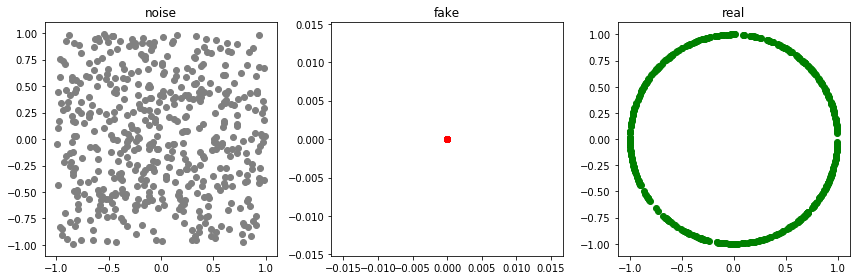

Epoch: 73 G-error: 0.7016934752464294 D-error: 1.3694653511047363


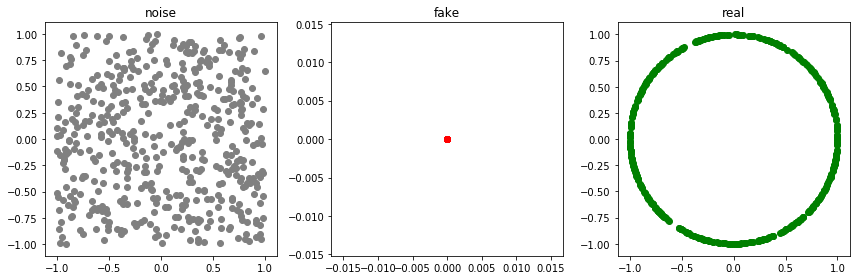

Epoch: 74 G-error: 0.7019630670547485 D-error: 1.3633453845977783


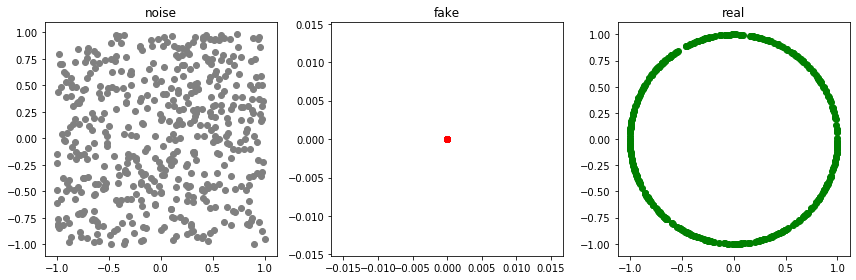

Epoch: 75 G-error: 0.7019630670547485 D-error: 1.3633453845977783


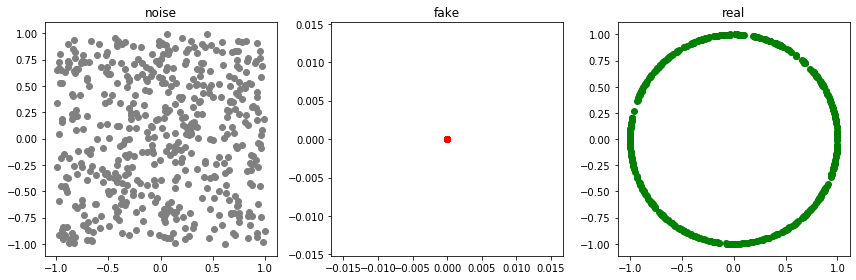

Epoch: 76 G-error: 0.7022392749786377 D-error: 1.362299919128418


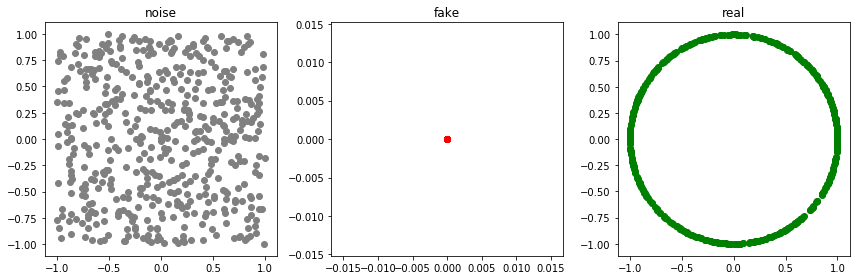

Epoch: 77 G-error: 0.7022392749786377 D-error: 1.362299919128418


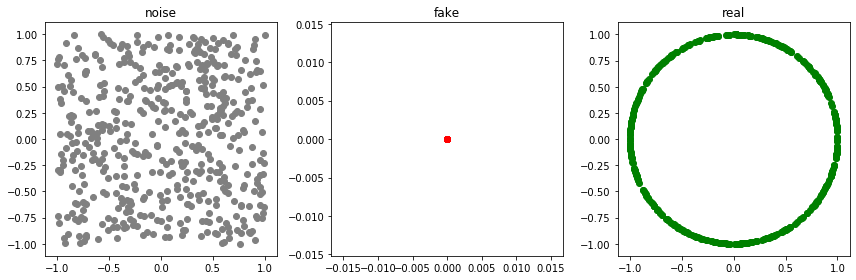

Epoch: 78 G-error: 0.7025231122970581 D-error: 1.3625433444976807


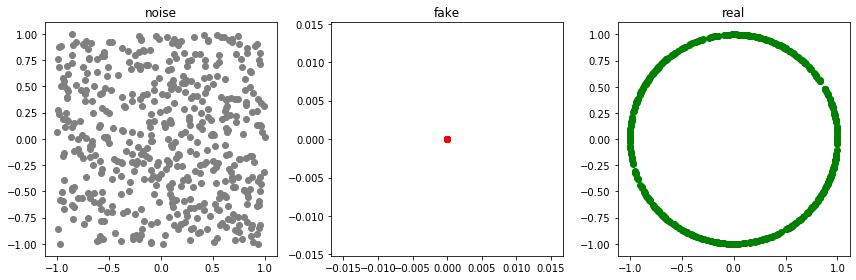

Epoch: 79 G-error: 0.7025231122970581 D-error: 1.3625433444976807


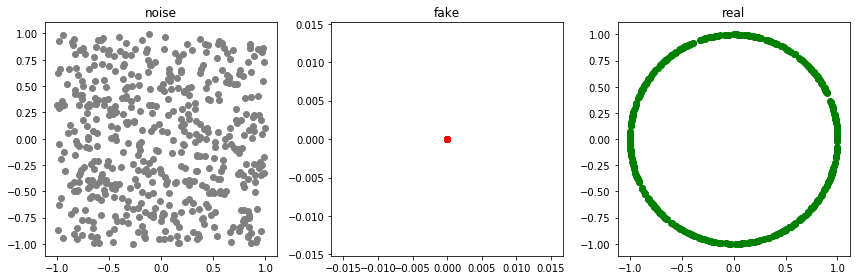

Epoch: 80 G-error: 0.7028204202651978 D-error: 1.3606258630752563


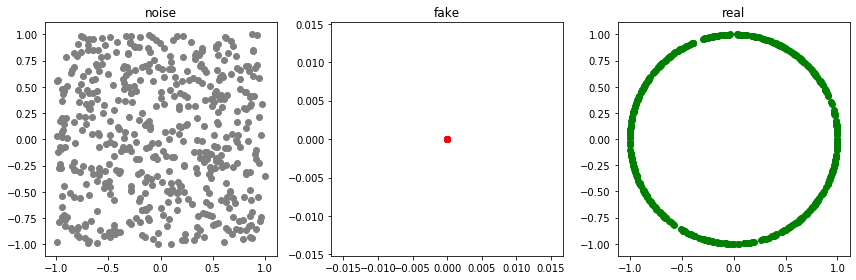

Epoch: 81 G-error: 0.7028204202651978 D-error: 1.3606258630752563


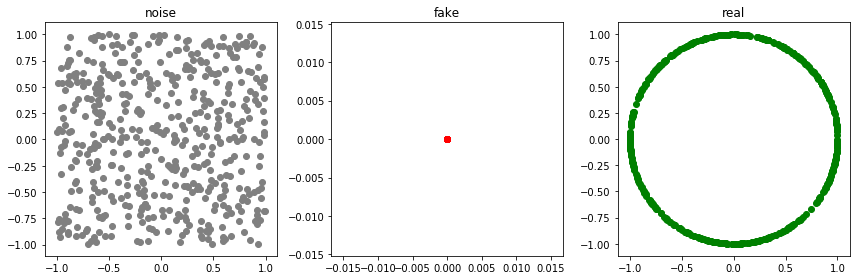

Epoch: 82 G-error: 0.7031444311141968 D-error: 1.361271858215332


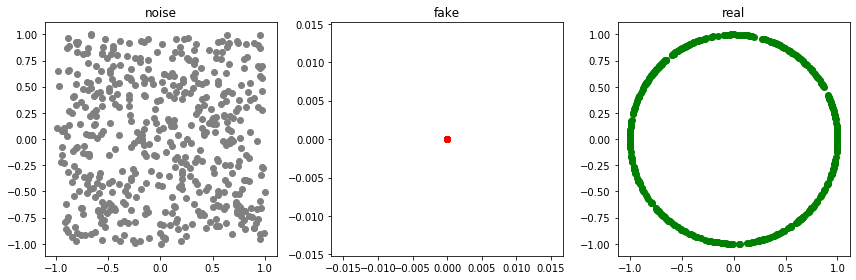

Epoch: 83 G-error: 0.7031444311141968 D-error: 1.361271858215332


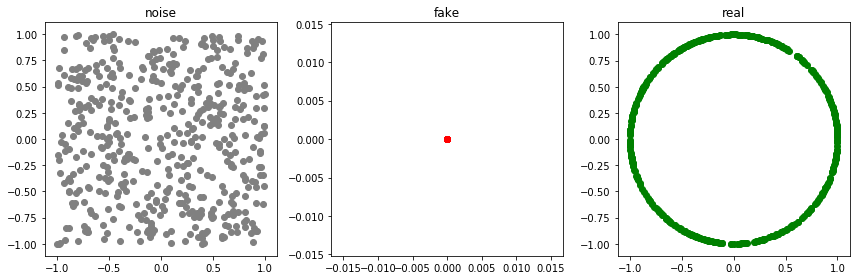

Epoch: 84 G-error: 0.7034613490104675 D-error: 1.3649699687957764


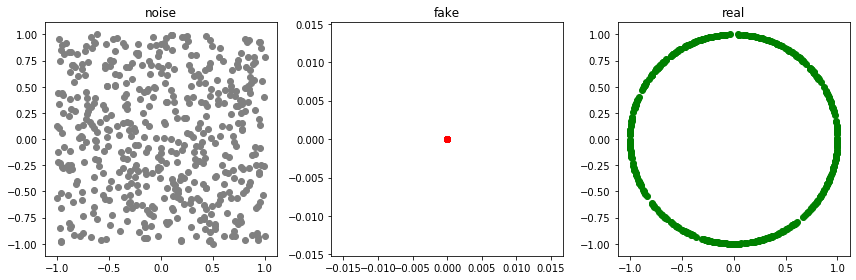

Epoch: 85 G-error: 0.7034613490104675 D-error: 1.3649699687957764


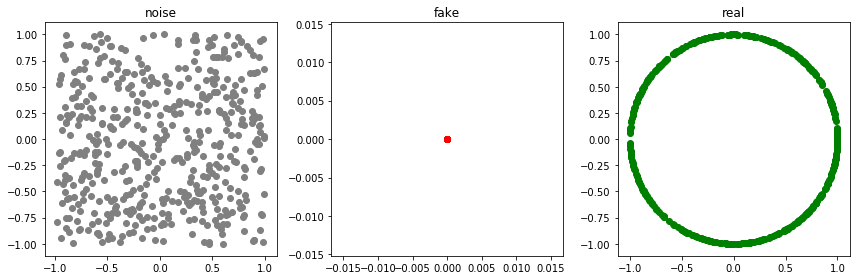

Epoch: 86 G-error: 0.7038159966468811 D-error: 1.3545494079589844


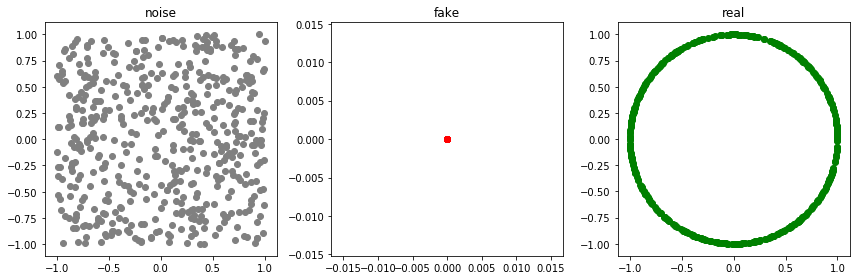

Epoch: 87 G-error: 0.7038159966468811 D-error: 1.3545494079589844


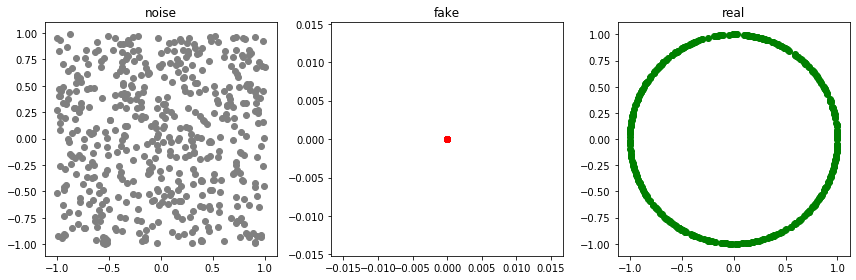

Epoch: 88 G-error: 0.7041626572608948 D-error: 1.3592396974563599


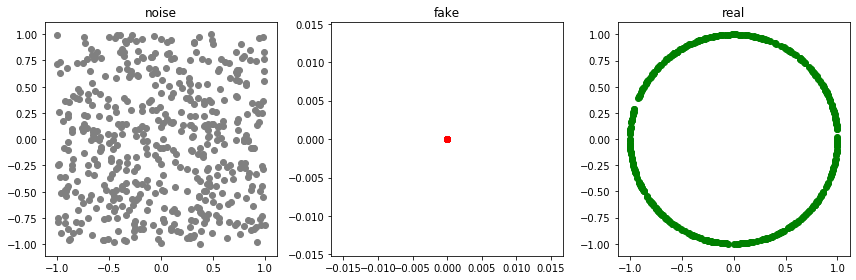

Epoch: 89 G-error: 0.7041626572608948 D-error: 1.3592396974563599


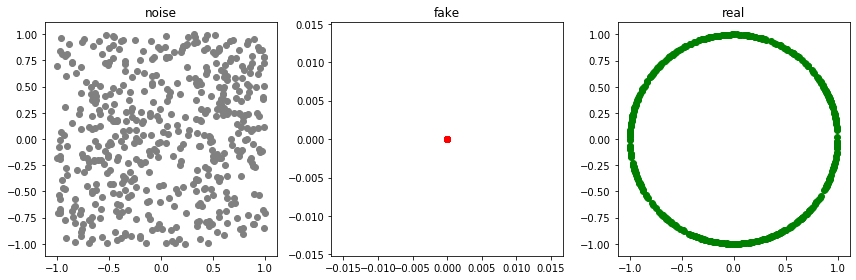

Epoch: 90 G-error: 0.7045281529426575 D-error: 1.354519009590149


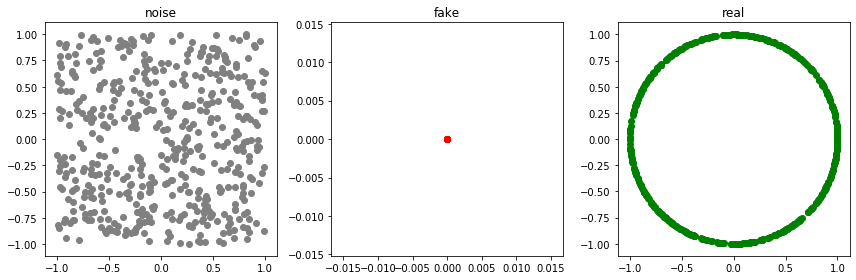

Epoch: 91 G-error: 0.7045281529426575 D-error: 1.354519009590149


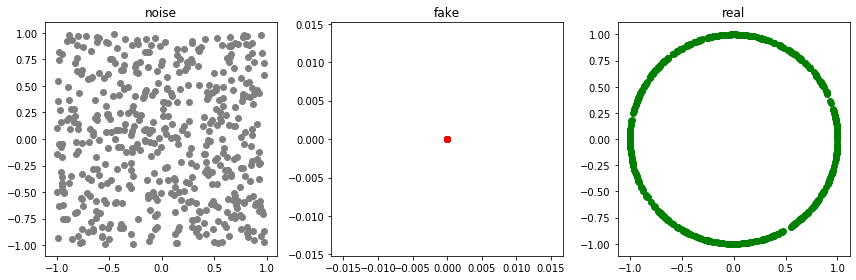

Epoch: 92 G-error: 0.7048943638801575 D-error: 1.3580501079559326


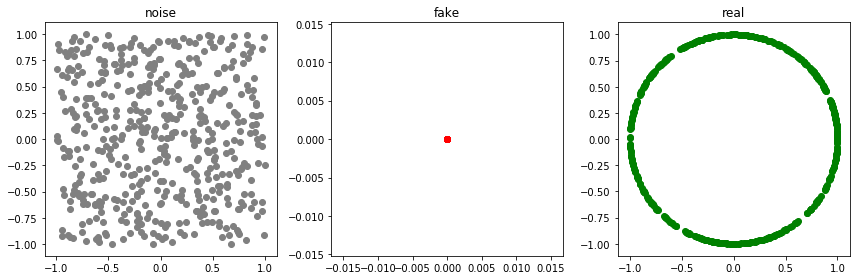

Epoch: 93 G-error: 0.7048943638801575 D-error: 1.3580501079559326


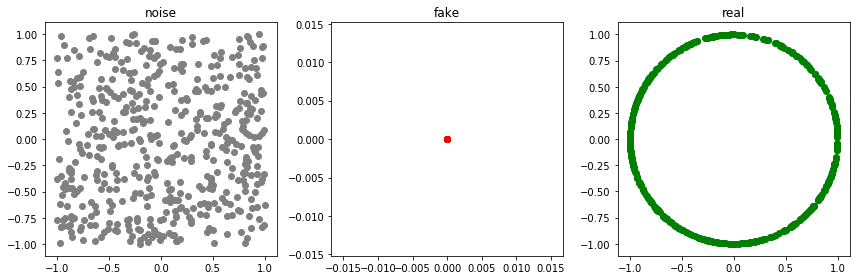

Epoch: 94 G-error: 0.7052524089813232 D-error: 1.3550704717636108


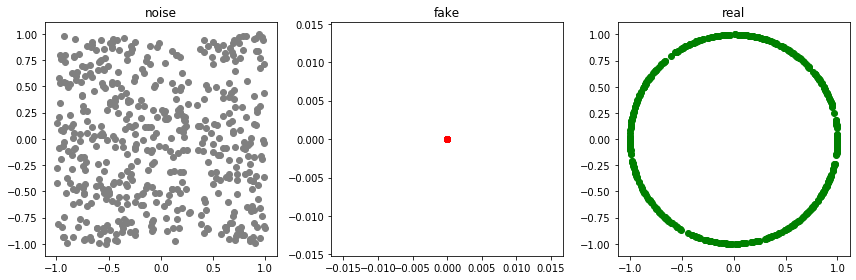

Epoch: 95 G-error: 0.7052524089813232 D-error: 1.3550704717636108


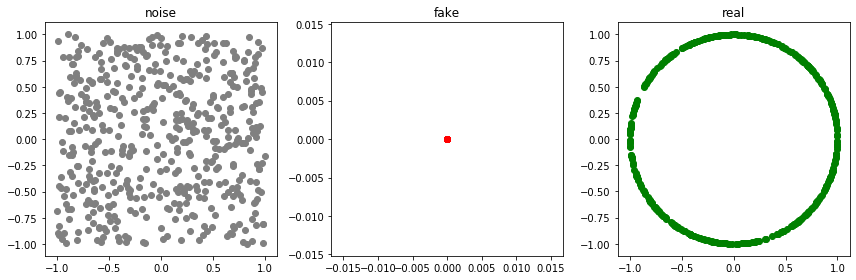

Epoch: 96 G-error: 0.7056164741516113 D-error: 1.3592565059661865


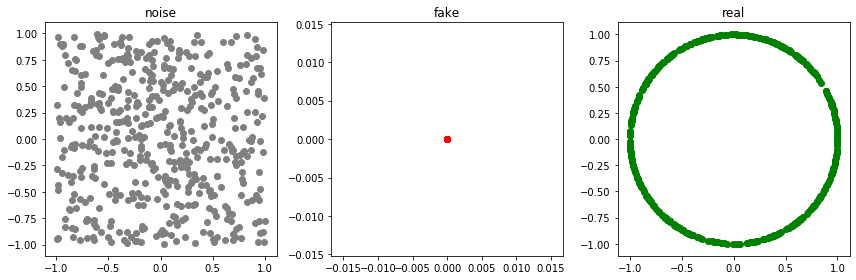

Epoch: 97 G-error: 0.7056164741516113 D-error: 1.3592565059661865


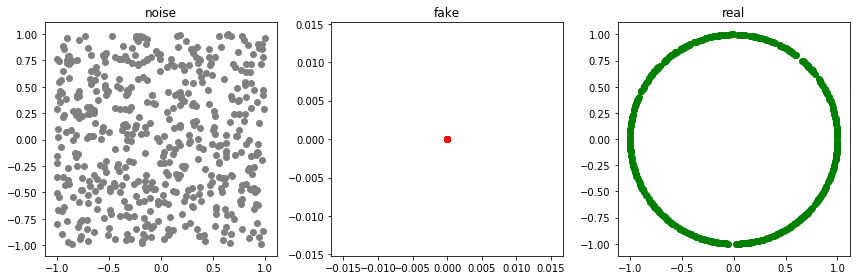

Epoch: 98 G-error: 0.7059831023216248 D-error: 1.3575447797775269


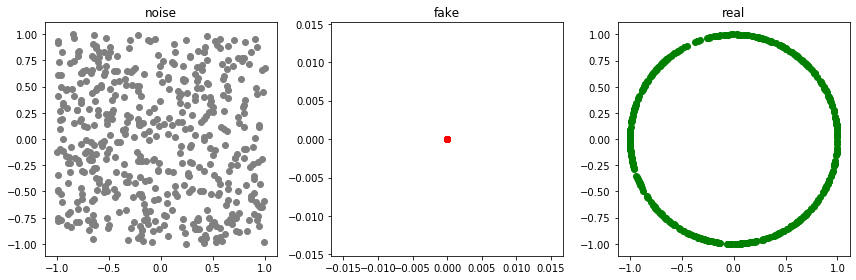

Epoch: 99 G-error: 0.7059831023216248 D-error: 1.3575447797775269


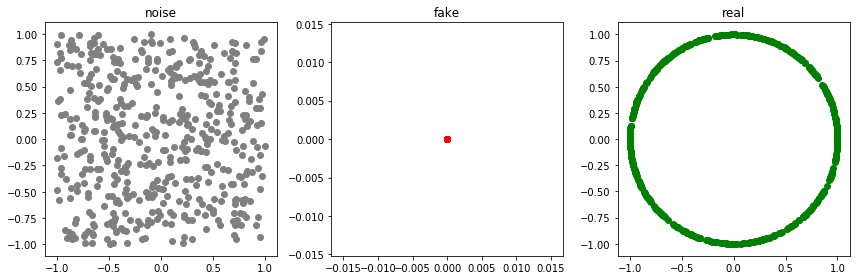

Epoch: 100 G-error: 0.7063494920730591 D-error: 1.3580803871154785


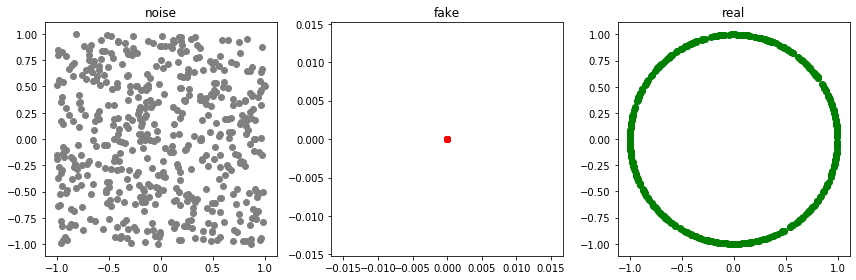

Epoch: 101 G-error: 0.7063494920730591 D-error: 1.3580803871154785


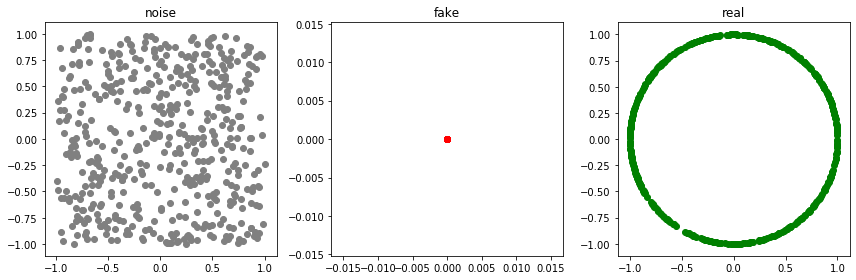

Epoch: 102 G-error: 0.7067043781280518 D-error: 1.360445261001587


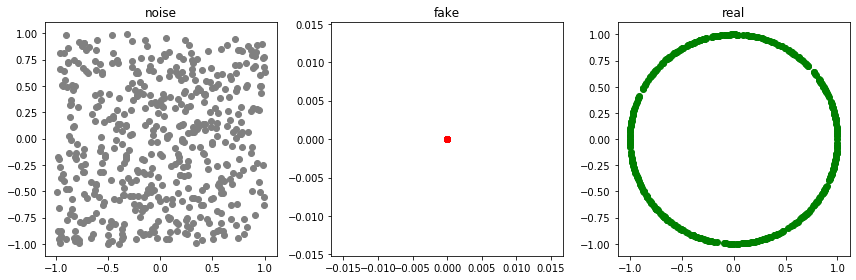

Epoch: 103 G-error: 0.7067043781280518 D-error: 1.360445261001587


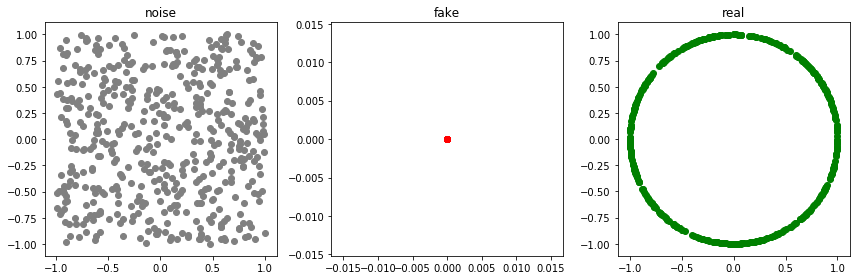

Epoch: 104 G-error: 0.7070512771606445 D-error: 1.3588594198226929


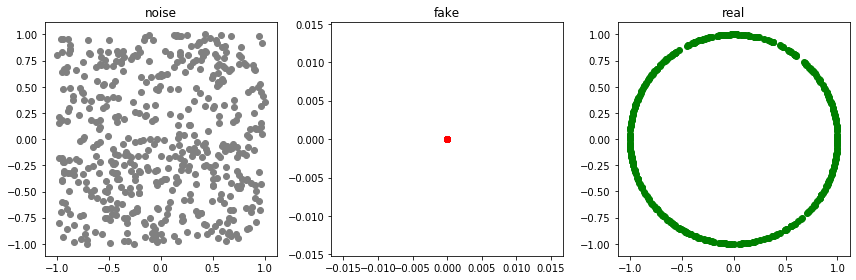

Epoch: 105 G-error: 0.7070512771606445 D-error: 1.3588594198226929


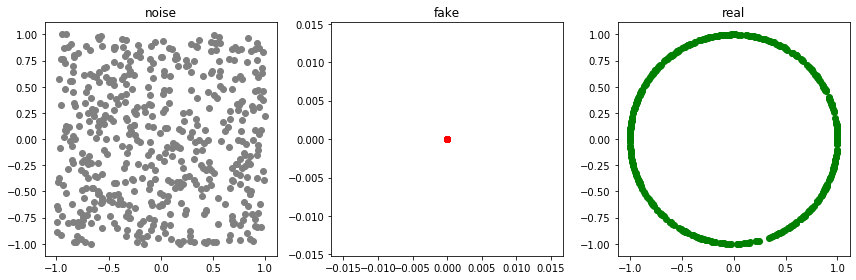

Epoch: 106 G-error: 0.7073752284049988 D-error: 1.3609964847564697


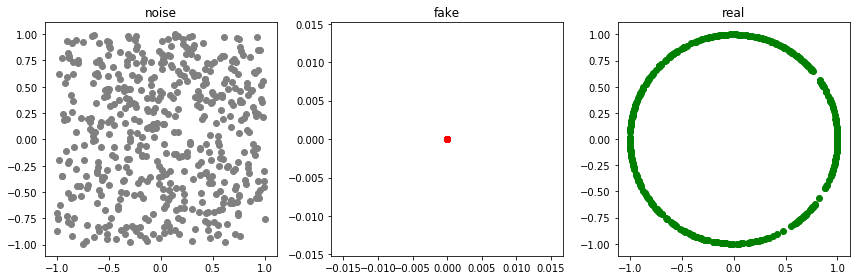

Epoch: 107 G-error: 0.7073752284049988 D-error: 1.3609964847564697


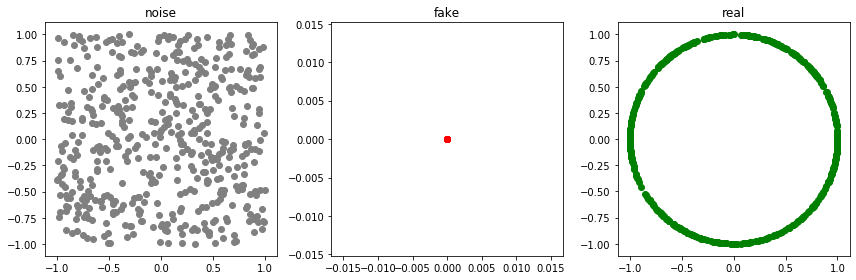

Epoch: 108 G-error: 0.7076942324638367 D-error: 1.3581727743148804


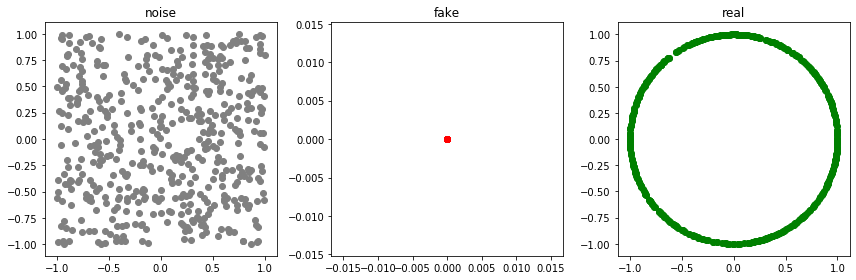

Epoch: 109 G-error: 0.7076942324638367 D-error: 1.3581727743148804


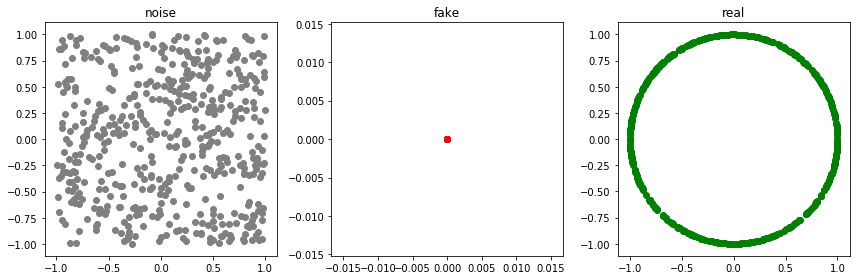

Epoch: 110 G-error: 0.7079969644546509 D-error: 1.3609825372695923


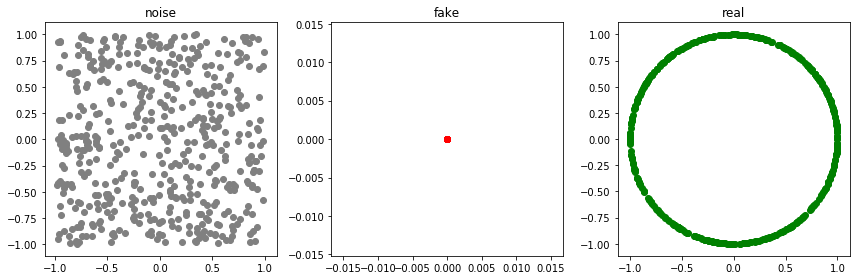

Epoch: 111 G-error: 0.7079969644546509 D-error: 1.3609825372695923


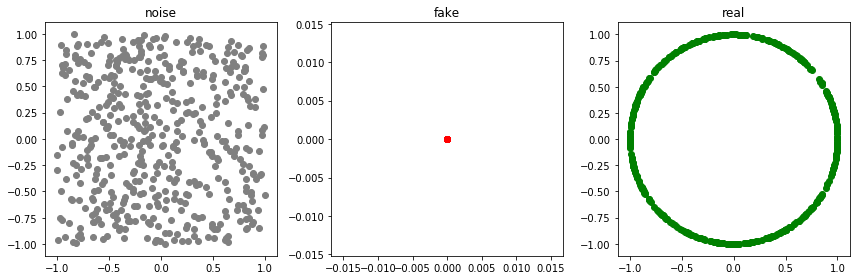

Epoch: 112 G-error: 0.7082908749580383 D-error: 1.352966070175171


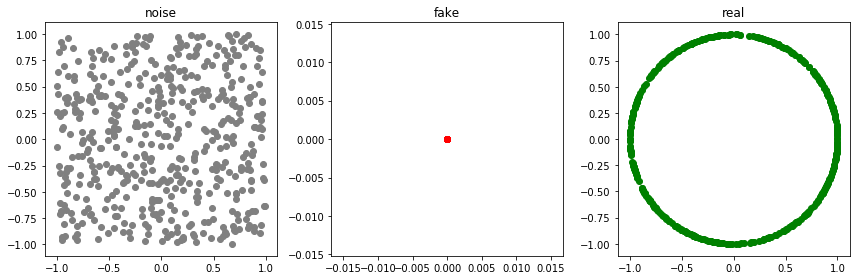

Epoch: 113 G-error: 0.7082908749580383 D-error: 1.352966070175171


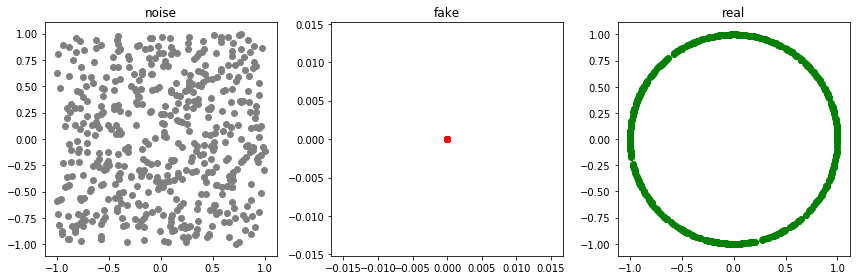

Epoch: 114 G-error: 0.708587110042572 D-error: 1.3574035167694092


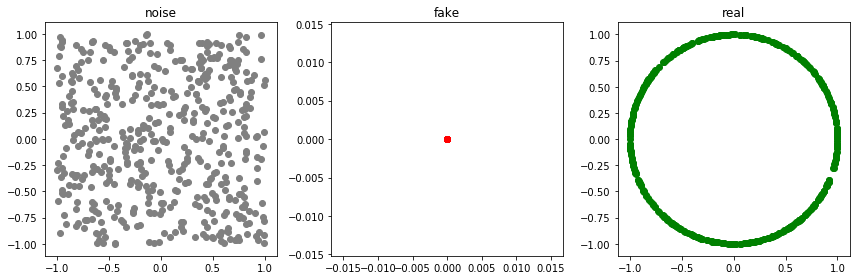

Epoch: 115 G-error: 0.708587110042572 D-error: 1.3574035167694092


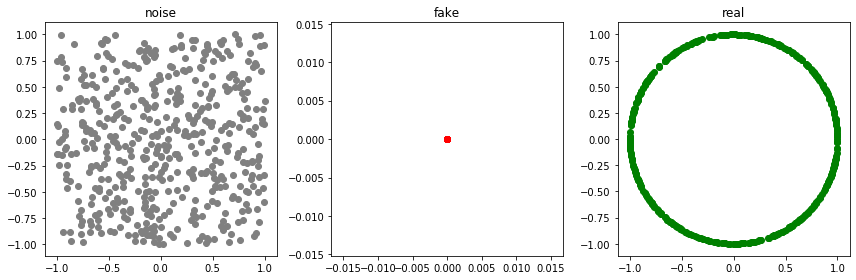

Epoch: 116 G-error: 0.7088901996612549 D-error: 1.352649450302124


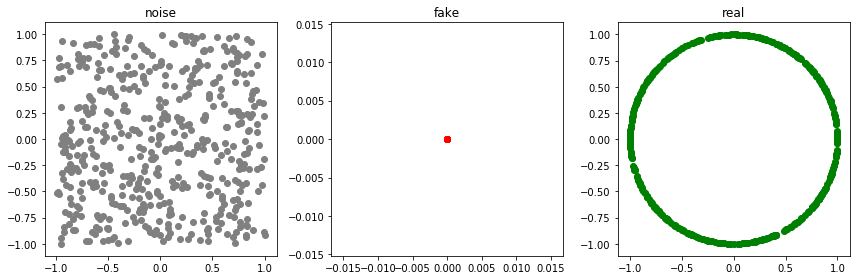

Epoch: 117 G-error: 0.7088901996612549 D-error: 1.352649450302124


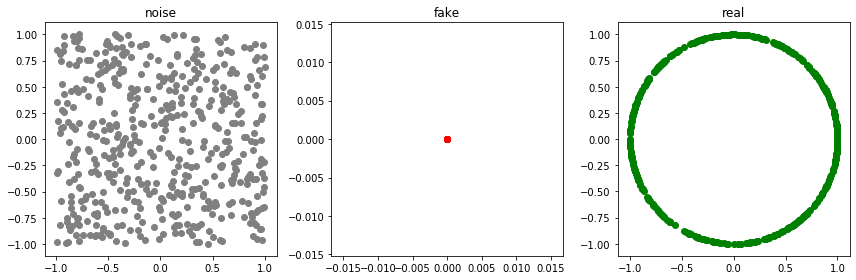

Epoch: 118 G-error: 0.7091896533966064 D-error: 1.3548160791397095


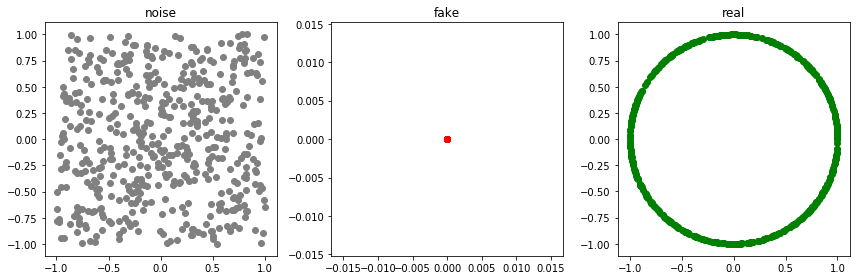

Epoch: 119 G-error: 0.7091896533966064 D-error: 1.3548160791397095


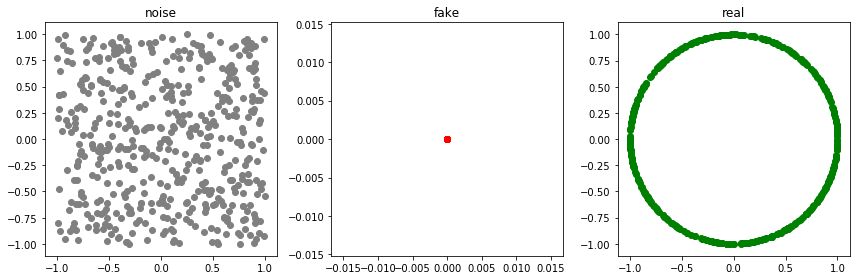

Epoch: 120 G-error: 0.7095029950141907 D-error: 1.3501882553100586


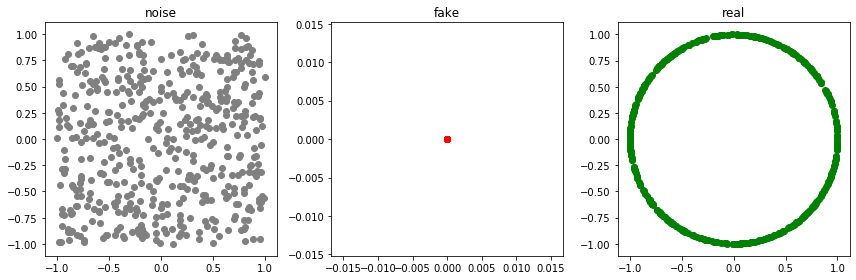

Epoch: 121 G-error: 0.7095029950141907 D-error: 1.3501882553100586


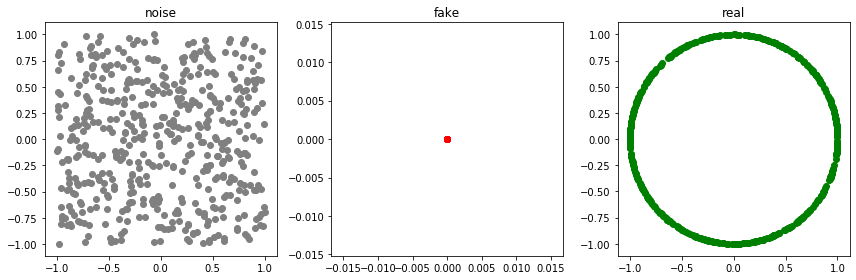

Epoch: 122 G-error: 0.7098062634468079 D-error: 1.3527424335479736


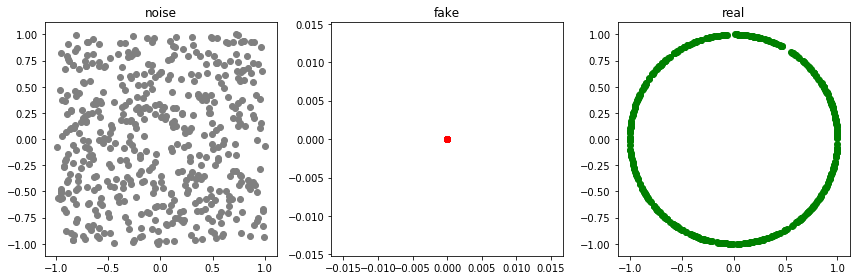

Epoch: 123 G-error: 0.7098062634468079 D-error: 1.3527424335479736


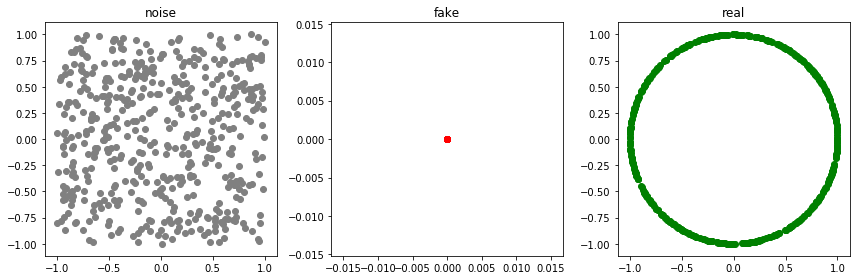

Epoch: 124 G-error: 0.7101109027862549 D-error: 1.350964069366455


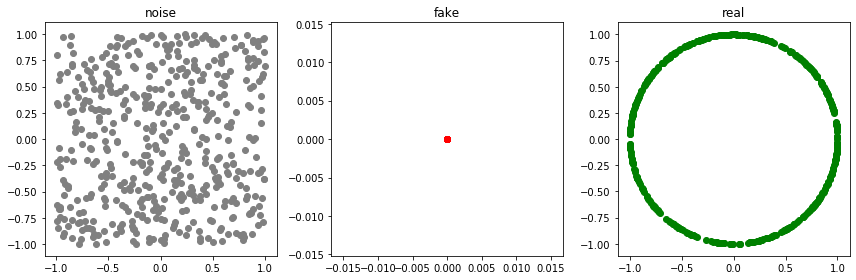

Epoch: 125 G-error: 0.7101109027862549 D-error: 1.350964069366455


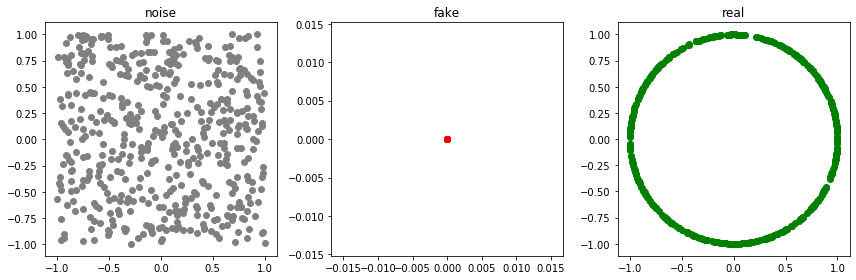

Epoch: 126 G-error: 0.7104166150093079 D-error: 1.349712610244751


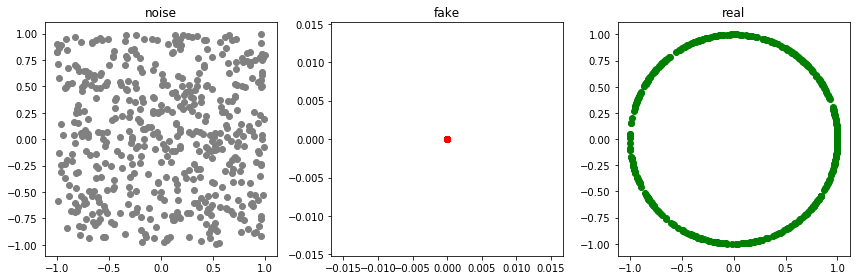

Epoch: 127 G-error: 0.7104166150093079 D-error: 1.349712610244751


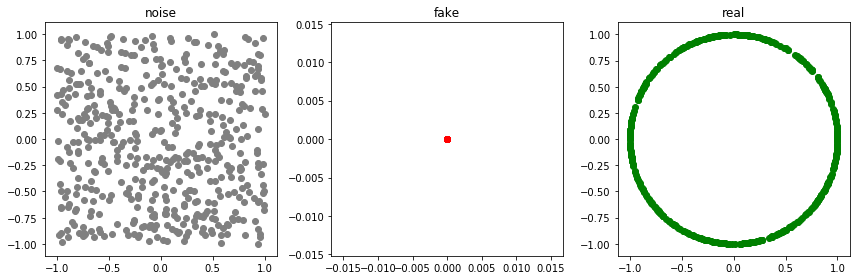

Epoch: 128 G-error: 0.7107239365577698 D-error: 1.348984718322754


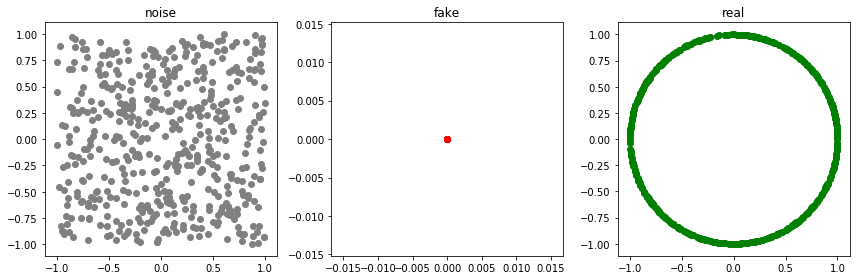

Epoch: 129 G-error: 0.7107239365577698 D-error: 1.348984718322754


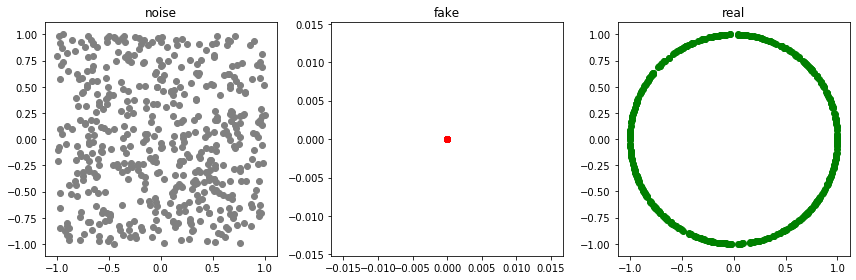

Epoch: 130 G-error: 0.7110379934310913 D-error: 1.3481049537658691


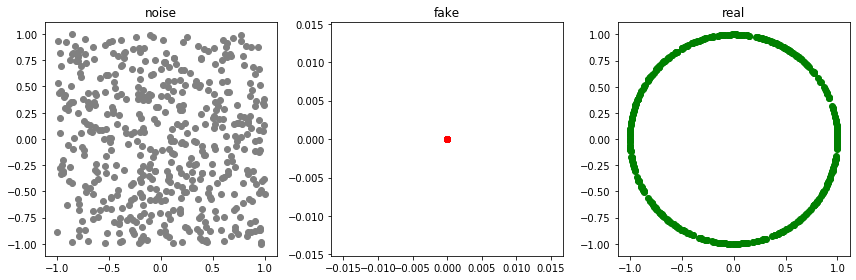

Epoch: 131 G-error: 0.7110379934310913 D-error: 1.3481049537658691


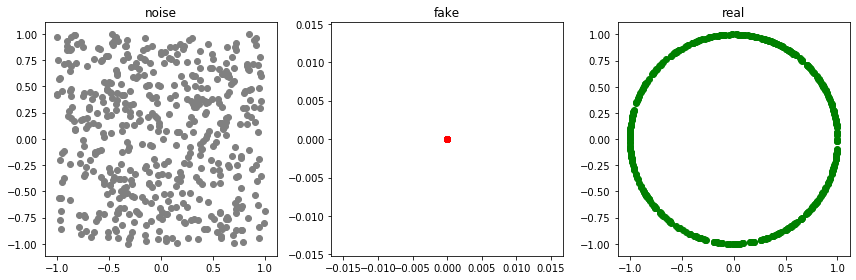

Epoch: 132 G-error: 0.7113543152809143 D-error: 1.3534424304962158


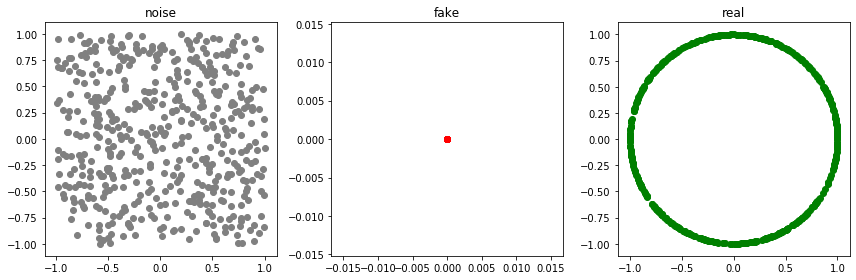

Epoch: 133 G-error: 0.7113543152809143 D-error: 1.3534424304962158


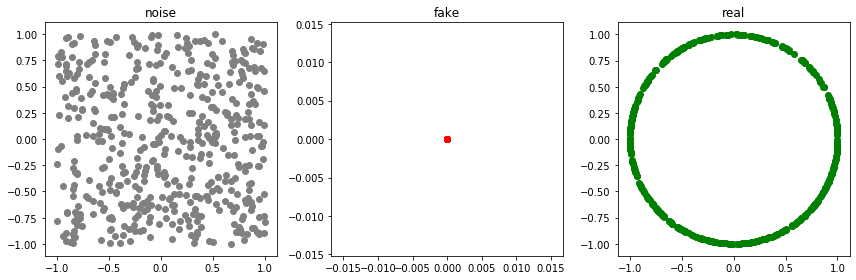

Epoch: 134 G-error: 0.7116808295249939 D-error: 1.3396304845809937


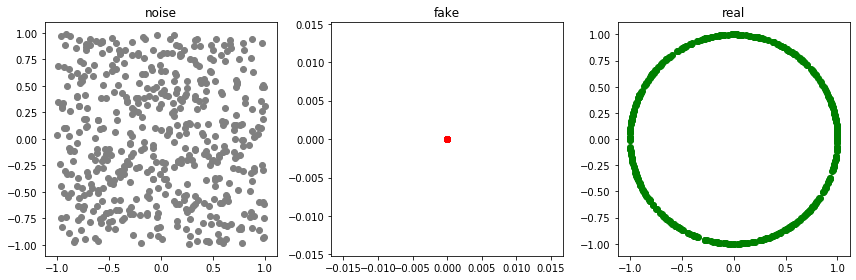

Epoch: 135 G-error: 0.7116808295249939 D-error: 1.3396304845809937


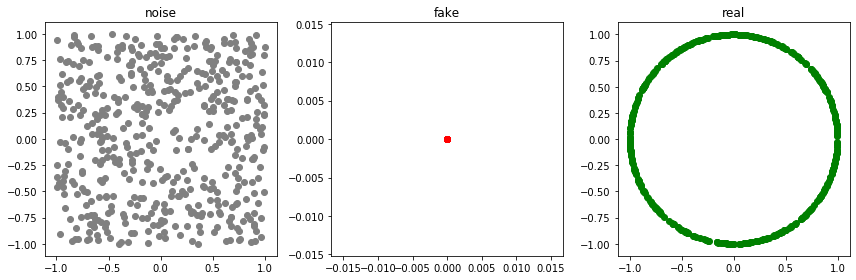

Epoch: 136 G-error: 0.7120057940483093 D-error: 1.3505609035491943


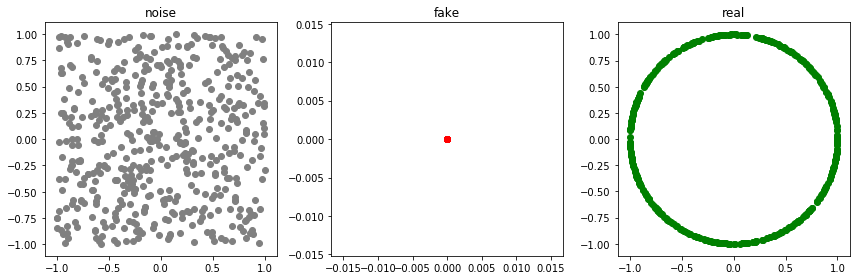

Epoch: 137 G-error: 0.7120057940483093 D-error: 1.3505609035491943


In [ ]:
num_epochs = 10000
sample_size = 500

for epoch in range(num_epochs):
    
    # real data
    angle = np.random.uniform(-np.pi,np.pi,(sample_size,1)).astype('float32')
    data = np.concatenate((np.cos(angle), np.sin(angle)),axis=1)
    real_data = t.from_numpy(data)
    
    # train discriminator:
    if epoch%2 ==0:
        noise = t.empty(sample_size,2, device=device).uniform_(-1,1)
        fake_data = generator(noise)  
        d_error = train_discriminator(d_optimizer, real_data, fake_data)
    
    # train generator     
    if epoch%1 ==0:
        noise = t.empty(sample_size,2, device=device).uniform_(-1,1)
        fake_data = generator(noise)  
        g_error = train_generator(g_optimizer, fake_data)
 
    
    if epoch%1 ==0:
        show(noise, fake_data, real_data)
        print(f"Epoch: {epoch} G-error: {g_error.item()} D-error: {d_error.item()}")


## Final result

In [ ]:
angle = np.random.uniform(-np.pi,np.pi,(sample_size,1)).astype('float32')
data = np.concatenate((np.cos(angle), np.sin(angle)),axis=1)
real_data = t.from_numpy(data)
    
    #fake data:
noise = t.empty(sample_size,2, device=device).uniform_(-1,1)
fake_data = generator(noise).detach()

show(noise, fake_data, real_data)

### Problem 1

Implement the GAN train loop that will train GAN to generate from the sample distribution.  

### Problem 2

Use another sampling distribution. One that is not concentrated on a line e.g. an ellipse. 